In [43]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier

# Function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle 

In [44]:
# Load dataset
df = pd.read_csv('/kaggle/input/athlete-non-athlete-survey2/Athlete_Non Athlete Survey1 - Athlete_Non-Athlete Survey  (1).csv')

# Gimpse of the dataset
df.head(10)

,Respondent ID,Start Date,End Date,Gender:,Age Group:,In what country do you live?,Suffering from a diagnosed mental health condition,Occupation,Marital Status,Are you a smoker?,...,It does not take me long to recover from a stressful event,It is hard for me to snap back when something bad happens,I usually come through difficult times with little trouble,I tend to take a long time to get over setbacks in my life,I experience a general sense of emptiness,I miss having people around,There are many people I can trust completely,I often feel rejected,There are enough people I feel close to,There are plenty of people I can rely on when I have problems
0,11785667914,2020-07-13 10:28:01,2020-07-13 10:36:03,Female,21-30,Ireland,NaN,Searching for work,Single,Never,...,Strongly Disagree,Agree,Disagree,Agree,Agree,Strongly Agree,Disagree,Agree,Agree,More or Less
1,11785634332,2020-07-13 10:11:10,2020-07-13 10:19:09,Female,31-40,United Kingdom of Great Britain and Northern I...,Depression anxiety eating disorder,Administrator,Married/cohabiting with partner,Never,...,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree
2,11784520014,2020-07-12 22:18:04,2020-07-12 22:31:53,Female,31-40,Ireland,NaN,Finance,Single,Ex-smoker,...,Neutral,Neutral,Disagree,Neutral,Agree,Agree,Disagree,Strongly Agree,Agree,Agree
3,11783867710,2020-07-12 15:09:10,2020-07-12 15:19:55,Female,18-20,Ireland,No,NaN,Single,Never,...,Agree,Disagree,Neutral,Disagree,Agree,More or Less,Agree,Disagree,Strongly Agree,Disagree
4,11783726076,2020-07-12 13:45:10,2020-07-12 13:56:49,Female,18-20,Ireland,NaN,Student,Single,Never,...,Disagree,Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Disagree,Agree
5,11783304758,2020-07-12 9:08:14,2020-07-12 9:14:16,Female,31-40,United Kingdom of Great Britain and Northern I...,No,Physiotherapist,Single,Daily (1-10),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11782483021,2020-07-11 21:58:38,2020-07-11 22:04:27,Male,41-50,Ireland,no,School principal,Married/cohabiting with partner,Ex-occassional smoker,...,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Agree
7,11782012375,2020-07-11 16:40:10,2020-07-11 17:03:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11782007234,2020-07-11 17:00:37,2020-07-11 17:07:03,Female,51-60,United Kingdom of Great Britain and Northern I...,No,Sales representative,Married/cohabiting with partner,Never,...,Neutral,Neutral,Neutral,Neutral,More or Less,Agree,Agree,Agree,More or Less,Agree
9,11781968072,2020-07-11 16:40:10,2020-07-11 16:41:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 68 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Respondent ID                                                                                                 860 non-null    int64  
 1   Start Date                                                                                                    860 non-null    object 
 2   End Date                                                                                                      860 non-null    object 
 3   Gender:                                                                                                       766 non-null    object 
 4   Age Group:                                              

In [46]:
# Look at the number of rows and columns of the dataset
df.shape

(860, 68)

In [47]:
# Look for missing values 
pd.set_option('display.max_rows',None)
df.isna().sum()

Respondent ID                                                                                                     0
Start Date                                                                                                        0
End Date                                                                                                          0
Gender:                                                                                                          94
Age Group:                                                                                                       94
In what country do you live?                                                                                     94
Suffering from a diagnosed mental health condition                                                              289
Occupation                                                                                                       98
Marital Status                                                          

In [48]:
# Check for duplicates
df.duplicated().sum()

0

In [49]:
# Create new dataset that does not include Start and End Date
df1 = df.copy()

df1= df1.drop(columns= ['Start Date', 'End Date'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 66 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Respondent ID                                                                                                 860 non-null    int64  
 1   Gender:                                                                                                       766 non-null    object 
 2   Age Group:                                                                                                    766 non-null    object 
 3   In what country do you live?                                                                                  766 non-null    object 
 4   Suffering from a diagnosed mental health condition      

In [50]:
# Check and see what type of values are in the 'Suffering from a diagnosed mental health condition' column
df1['Suffering from a diagnosed mental health condition'].value_counts()

Suffering from a diagnosed mental health condition
No                                                                             427
no                                                                              22
Yes                                                                             21
Anxiety                                                                         18
N/a                                                                             16
Depression                                                                       9
none                                                                             3
Depression and anxiety                                                           3
Not                                                                              2
I am not                                                                         2
Anxiety and depression                                                           2
Na                                  

I will replace dignosed mental health conditions into certain categories to make it easier to read

In [51]:
# Replace all answers in the Diagnosis column that mean No mental illness disorder with 'No'
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({'no': 'No', 'I am not': 'No', 'NO':'No', 'Not':'No','No - unless Fibromyalgia counts!':'No','No I am not':'No', 'No diagnosed mental conditions':'No', 'Nothing diagnosed':'No','None diagnosed':'No', 'N0':'No', 'none':'No', 'N/a':'No'})
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({'Not Suffering':'No', 'Not currently. Previous depression, anxiety, PTSD':'No', 'Na':'No', 'N/A':'No', 'N/a.':'No',"I don't":'No','I’m not':'No', 'N':'No', 'N/a (not yet)':'No', 'N\A':'No','Not suffering from any condition':'No','Aspergers':'No', 'Asthma':'No', 'PMR':'No'})

# Replace all answers in the Diagnosis column that mean Having both Depression and Aniety with 'Depression and Anxiety'
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({'Depression and anxiety':'Depression and Anxiety', 'Anxiety and depression':'Depression and Anxiety','Yes. Depression and anxiety':'Depression and Anxiety','Yes I suffer from depression and anxiety':'Depression and Anxiety','anxiety/depression':'Depression and Anxiety','Generalised Anxiety Disorder & Depression':'Depression and Anxiety','Depression anxiety':'Depression and Anxiety','Anxiety/Depression':'Depression and Anxiety','Anxiety disorder. Depression':'Depression and Anxiety','Anxiety Depression':'Depression and Anxiety','Anxiety & Depression':'Depression and Anxiety',})

# Replace all answers in the Diagnosis column that mean Anxiety with 'Anxiety'
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({'Yes, anxiety':'Anxiety','Grief induced anxiety':'Anxiety','Anxiety and Panic Attacks':'Anxiety','Anxiety (not sure if it counts as a diagnosis, but am on medication for it)':'Anxiety' })

# Replace all answers in the Diagnosis column that mean Depression with 'Depression'
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({'Depression anxiety eating disorder':'Depression','Yes - Depression':'Depression','Depression and GAD':'Depression','Depresion':'Depression','depression':'Depression'})

# Replace all answers in the Diagnosis column that mean Bipolar with 'Bipolar'
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({'Bi polar':'Bipolar','Bipolar disorder':'Bipolar'})

# Replace all answers in the Diagnosis column that mean Eating Disorder with 'Eating Disorder'
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({"Anorexia but personally I don't believe it is a mental health condition":'Eating Disorder','Eating Disorder Recovery':'Eating Disorder'})

# Replace all answers in the Diagnosis column that are 'Yes' with 'Yes, but did not specify'
df1['Suffering from a diagnosed mental health condition'] = df1['Suffering from a diagnosed mental health condition'].replace({'Yes':'Yes, but did not specify'})

We want to change the columns datatype to 'cateforical' so we are able to encode it later.

In [52]:
# Changing columns to categorigal data type

df1[['Respondent ID','Gender:','Age Group:','In what country do you live?']]= df1[['Respondent ID','Gender:','Age Group:','In what country do you live?']].astype('category')


In [53]:
# Changing columns to categorigal data type

df1[['Suffering from a diagnosed mental health condition', 'Occupation', 'Marital Status', 'Are you a smoker?', 'Do you eat 5 or more portions of fruit and vegetables per day?', 'How much sleep do you usually get per night?']]= df1[['Suffering from a diagnosed mental health condition', 'Occupation', 'Marital Status', 'Are you a smoker?', 'Do you eat 5 or more portions of fruit and vegetables per day?', 'How much sleep do you usually get per night?']].astype('category')

In [54]:
# Changing columns to categorigal data type

df1[['Since the outbreak of COVID-19, have you had to sheild?','How many weeks have you been abiding by social distancing rules?','Number of people in the household throughout lockdown (isolation bubble):','Are you an athlete involved in a structured, rule-bound, competitive physical activity?',
'I consider myself an athlete','I have many goals related to sport','Most of my friends are athletes','Sport is the most important part of my life','I spend more time thinking about sport than anything else','I feel bad about myself when I do badly in sport',
'I would be very depressed if I were injured and could not compete in sport','What sport do you primarily play?']] = df1[['Since the outbreak of COVID-19, have you had to sheild?','How many weeks have you been abiding by social distancing rules?','Number of people in the household throughout lockdown (isolation bubble):','Are you an athlete involved in a structured, rule-bound, competitive physical activity?',
'I consider myself an athlete','I have many goals related to sport','Most of my friends are athletes','Sport is the most important part of my life','I spend more time thinking about sport than anything else','I feel bad about myself when I do badly in sport',
'I would be very depressed if I were injured and could not compete in sport','What sport do you primarily play?']].astype('category')

In [55]:
# Changing columns to categorigal data type

df1[['Sport level:','On average per week, how many hours do you spend participating in your sport?' , 'Competing - Hours',
'Are you an individual (e.g. running, boxing) or team-based (e.g. soccer, netball) athlete?','During the past month how often did you feel Happy',
'During the past month how often did you feel Interested in life','During the past month how often did you feel Satisfied',
'During the past month how often did you feel that you had somthing important to contribute to society',
'During the past month how often did you feel that you belong to a community',
'During the past month how often did you feel that our society is becoming a better place for people like you',
'That people are basically good','That the way our society works makes sense to you','That you liked most parts of your personality',
'Good at managing the responsibilities of your daily life']] = df1[['Sport level:','On average per week, how many hours do you spend participating in your sport?','Competing - Hours',
'Are you an individual (e.g. running, boxing) or team-based (e.g. soccer, netball) athlete?', 'During the past month how often did you feel Happy',
'During the past month how often did you feel Interested in life','During the past month how often did you feel Satisfied',
'During the past month how often did you feel that you had somthing important to contribute to society',
'During the past month how often did you feel that you belong to a community',
'During the past month how often did you feel that our society is becoming a better place for people like you',
'That people are basically good','That the way our society works makes sense to you','That you liked most parts of your personality',
'Good at managing the responsibilities of your daily life']].astype('category')

In [56]:
# Changing columns to categorigal data type

df1[['That you had warm and trusting relationships with others',
'That you had experiences that challenged you to grow and become a better person',
'Confident to think or express your own ideas and opinions',
'That your life has a sense of direction or meaning to it',
"I feel tense or 'wound up':",
'I still enjoy the things I used to enjoy:',
'I get a sort of frightened feeling as if something awful is about to happen:',
'I can laugh and see the funny side of things:',
'Worrying thoughts go through my mind:',
'I feel cheerful:',
'I can sit at ease and feel relaxed:',
'I feel as if I am slowed down:',
"I get a sort of frightened feeling like 'butterflies' in my stomach:",
'I have lost interest in my appearance:',
'I feel restless as I have to be on the move:']] = df1[['That you had warm and trusting relationships with others',
'That you had experiences that challenged you to grow and become a better person',
'Confident to think or express your own ideas and opinions',
'That your life has a sense of direction or meaning to it',
"I feel tense or 'wound up':",
'I still enjoy the things I used to enjoy:',
'I get a sort of frightened feeling as if something awful is about to happen:',
'I can laugh and see the funny side of things:',
'Worrying thoughts go through my mind:',
'I feel cheerful:',
'I can sit at ease and feel relaxed:',
'I feel as if I am slowed down:',
"I get a sort of frightened feeling like 'butterflies' in my stomach:",
'I have lost interest in my appearance:',
'I feel restless as I have to be on the move:']].astype('category')

In [57]:
# Changing columns to categorigal data type

df1[['I look forward with enjoyment to things:',
'I get sudden feelings of panic:',
'I can enjoy a good book or radio or TV programme:',
'I tend to bounce back quickly after hard times',
'I have a hard time making it through stressful events',
'It does not take me long to recover from a stressful event',
'It is hard for me to snap back when something bad happens',
'I usually come through difficult times with little trouble',
'I tend to take a long time to get over setbacks in my life',
'I experience a general sense of emptiness',
'I miss having people around',
'There are many people I can trust completely',
'I often feel rejected',
'There are enough people I feel close to',
'There are plenty of people I can rely on when I have problems']] = df1[['I look forward with enjoyment to things:',
'I get sudden feelings of panic:',
'I can enjoy a good book or radio or TV programme:',
'I tend to bounce back quickly after hard times',
'I have a hard time making it through stressful events',
'It does not take me long to recover from a stressful event',
'It is hard for me to snap back when something bad happens',
'I usually come through difficult times with little trouble',
'I tend to take a long time to get over setbacks in my life',
'I experience a general sense of emptiness',
'I miss having people around',
'There are many people I can trust completely',
'I often feel rejected',
'There are enough people I feel close to',
'There are plenty of people I can rely on when I have problems']].astype('category')

In [58]:
# Create dataframe of just column names
df2=df1.copy()
col_num =df2.columns
col_num.tolist()

['Respondent ID',
 'Gender:',
 'Age Group:',
 'In what country do you live?',
 'Suffering from a diagnosed mental health condition',
 'Occupation',
 'Marital Status',
 'Are you a smoker?',
 'Do you eat 5 or more portions of fruit and vegetables per day?',
 'How much sleep do you usually get per night?',
 'Since the outbreak of COVID-19, have you had to sheild?',
 'How many weeks have you been abiding by social distancing rules?',
 'Number of people in the household throughout lockdown (isolation bubble):',
 'Are you an athlete involved in a structured, rule-bound, competitive physical activity?',
 'I consider myself an athlete',
 'I have many goals related to sport',
 'Most of my friends are athletes',
 'Sport is the most important part of my life',
 'I spend more time thinking about sport than anything else',
 'I feel bad about myself when I do badly in sport',
 'I would be very depressed if I were injured and could not compete in sport',
 'What sport do you primarily play?',
 'Sport 

In [59]:
# Check to see if new dataset 'df2' was copied properly and that the datatype has all been changed to 'categorical'
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 66 columns):
 #   Column                                                                                                        Non-Null Count  Dtype   
---  ------                                                                                                        --------------  -----   
 0   Respondent ID                                                                                                 860 non-null    category
 1   Gender:                                                                                                       766 non-null    category
 2   Age Group:                                                                                                    766 non-null    category
 3   In what country do you live?                                                                                  766 non-null    category
 4   Suffering from a diagnosed mental health condition

In [60]:
df2[col_num].head()

,Respondent ID,Gender:,Age Group:,In what country do you live?,Suffering from a diagnosed mental health condition,Occupation,Marital Status,Are you a smoker?,Do you eat 5 or more portions of fruit and vegetables per day?,How much sleep do you usually get per night?,...,It does not take me long to recover from a stressful event,It is hard for me to snap back when something bad happens,I usually come through difficult times with little trouble,I tend to take a long time to get over setbacks in my life,I experience a general sense of emptiness,I miss having people around,There are many people I can trust completely,I often feel rejected,There are enough people I feel close to,There are plenty of people I can rely on when I have problems
0,11785667914,Female,21-30,Ireland,NaN,Searching for work,Single,Never,No,6.5,...,Strongly Disagree,Agree,Disagree,Agree,Agree,Strongly Agree,Disagree,Agree,Agree,More or Less
1,11785634332,Female,31-40,United Kingdom of Great Britain and Northern I...,Depression,Administrator,Married/cohabiting with partner,Never,Yes,7.0,...,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree
2,11784520014,Female,31-40,Ireland,NaN,Finance,Single,Ex-smoker,No,4.0,...,Neutral,Neutral,Disagree,Neutral,Agree,Agree,Disagree,Strongly Agree,Agree,Agree
3,11783867710,Female,18-20,Ireland,No,NaN,Single,Never,No,8.0,...,Agree,Disagree,Neutral,Disagree,Agree,More or Less,Agree,Disagree,Strongly Agree,Disagree
4,11783726076,Female,18-20,Ireland,NaN,Student,Single,Never,Yes,8.5,...,Disagree,Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Disagree,Agree


In [61]:
# Create a seperate dataset, that will be used to contain a dataset will no nulls. A dataset where we drop the nulls.
nona_df2=df2.copy()
nona_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 66 columns):
 #   Column                                                                                                        Non-Null Count  Dtype   
---  ------                                                                                                        --------------  -----   
 0   Respondent ID                                                                                                 860 non-null    category
 1   Gender:                                                                                                       766 non-null    category
 2   Age Group:                                                                                                    766 non-null    category
 3   In what country do you live?                                                                                  766 non-null    category
 4   Suffering from a diagnosed mental health condition

In [62]:
# Create dataframe of just column names of dataframe with no nulls
col_num2 =nona_df2.columns
col_num2.tolist()

['Respondent ID',
 'Gender:',
 'Age Group:',
 'In what country do you live?',
 'Suffering from a diagnosed mental health condition',
 'Occupation',
 'Marital Status',
 'Are you a smoker?',
 'Do you eat 5 or more portions of fruit and vegetables per day?',
 'How much sleep do you usually get per night?',
 'Since the outbreak of COVID-19, have you had to sheild?',
 'How many weeks have you been abiding by social distancing rules?',
 'Number of people in the household throughout lockdown (isolation bubble):',
 'Are you an athlete involved in a structured, rule-bound, competitive physical activity?',
 'I consider myself an athlete',
 'I have many goals related to sport',
 'Most of my friends are athletes',
 'Sport is the most important part of my life',
 'I spend more time thinking about sport than anything else',
 'I feel bad about myself when I do badly in sport',
 'I would be very depressed if I were injured and could not compete in sport',
 'What sport do you primarily play?',
 'Sport 

In [63]:
nona_df2[col_num2].head(5)

,Respondent ID,Gender:,Age Group:,In what country do you live?,Suffering from a diagnosed mental health condition,Occupation,Marital Status,Are you a smoker?,Do you eat 5 or more portions of fruit and vegetables per day?,How much sleep do you usually get per night?,...,It does not take me long to recover from a stressful event,It is hard for me to snap back when something bad happens,I usually come through difficult times with little trouble,I tend to take a long time to get over setbacks in my life,I experience a general sense of emptiness,I miss having people around,There are many people I can trust completely,I often feel rejected,There are enough people I feel close to,There are plenty of people I can rely on when I have problems
0,11785667914,Female,21-30,Ireland,NaN,Searching for work,Single,Never,No,6.5,...,Strongly Disagree,Agree,Disagree,Agree,Agree,Strongly Agree,Disagree,Agree,Agree,More or Less
1,11785634332,Female,31-40,United Kingdom of Great Britain and Northern I...,Depression,Administrator,Married/cohabiting with partner,Never,Yes,7.0,...,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree
2,11784520014,Female,31-40,Ireland,NaN,Finance,Single,Ex-smoker,No,4.0,...,Neutral,Neutral,Disagree,Neutral,Agree,Agree,Disagree,Strongly Agree,Agree,Agree
3,11783867710,Female,18-20,Ireland,No,NaN,Single,Never,No,8.0,...,Agree,Disagree,Neutral,Disagree,Agree,More or Less,Agree,Disagree,Strongly Agree,Disagree
4,11783726076,Female,18-20,Ireland,NaN,Student,Single,Never,Yes,8.5,...,Disagree,Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Disagree,Agree


The df2 dataset has many missing values, instead of dropping these values I will practice 'imputation'. Replaceing missing values with the 'mode' of each column

In [64]:
#Create a for loop to fill all nulls with its columns mode

for col in col_num:
    df2[col]=df2[col].fillna(df2[col].mode().iloc[0])

In [65]:
#Check to see if all nulls were filled in the df2 dataset

df2.isna().sum()

Respondent ID                                                                                                   0
Gender:                                                                                                         0
Age Group:                                                                                                      0
In what country do you live?                                                                                    0
Suffering from a diagnosed mental health condition                                                              0
Occupation                                                                                                      0
Marital Status                                                                                                  0
Are you a smoker?                                                                                               0
Do you eat 5 or more portions of fruit and vegetables per day?                          

For dataset df2, there are to many sports played in this dataset. So to make it easier to read, I will clump sports together in 7 categories ('Track & Field', 'Ball sports', 'Dance, Gymnastics and Strength', 'Combat Sports', 'Rowing & Kayaking' and  'Yoga and Acrobatics'). 

In [66]:
# For dataset df2 column 'What sport do you play?' clump sports in 7 categories ('Track & Field','Ball sports','Dance, Gymnastics and Strength','Combat Sports','Rowing & Kayaking' and 'Yoga and Acrobatics'). Replace origial sport names with these diffrent categories  

df2['What sport do you primarily play?'] = df2['What sport do you primarily play?'].replace({'Running (long distance)':'Track & Field','Running (med distance)':'Track & Field','Running (sprinting)':'Track & Field','High Jump':'Track & Field','Long Jump':'Track & Field','Hurdles - athletics':'Track & Field','triathlon':'Track & Field','Triathlon':'Track & Field','Shot put':'Track & Field'})

df2['What sport do you primarily play?'] = df2['What sport do you primarily play?'].replace({'Soccer':'Ball Sports','Gaelic football':'Ball Sports','Golf':'Ball Sports','Squash':'Ball Sports','Waterpolo':'Ball Sports','Camogie':'Ball Sports','Touch Rugby':'Ball Sports','Dodgeball':'Ball Sports','Netball':'Ball Sports','Football':'Ball Sports','Tennis':'Ball Sports','Rugby':'Ball Sports','Hockey':'Ball Sports','Hurling':'Ball Sports','Wheelchair rugby':'Ball Sports','Cricket':'Ball Sports', 'Racketball':'Ball Sports'})

df2['What sport do you primarily play?'] = df2['What sport do you primarily play?'].replace({'Dancing':'Dance, Gymnastics and Strength','Dance':'Dance, Gymnastics and Strength','Crossfit':'Dance, Gymnastics and Strength','Weight-lifting':'Dance, Gymnastics and Strength','Weightlifting for personal goals':'Dance, Gymnastics and Strength','Powerlifting':'Dance, Gymnastics and Strength','CrossFit':'Dance, Gymnastics and Strength','Bodybuilding':'Dance, Gymnastics and Strength'})

df2['What sport do you primarily play?'] = df2['What sport do you primarily play?'].replace({'Kickboxing':'Combat Sports','Judo':'Combat Sports','Karate':'Combat Sports'})

df2['What sport do you primarily play?'] = df2['What sport do you primarily play?'].replace({'Rowing':'Rowing & Kayaking','Kayaking':'Rowing & Kayaking'})

df2['What sport do you primarily play?'] = df2['What sport do you primarily play?'].replace({'Aerial acrobatics':'Yoga and Acrobatics','Ashtanga yoga and acrobatics':'Yoga and Acrobatics','Equestrian sport':'Equestrian','Equestrian':'Equestrian', 'Equestrian':'Equestrian' })

/tmp/ipykernel_32/1342571879.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['What sport do you primarily play?'] = df2['What sport do you primarily play?'].replace({'Running (long distance)':'Track & Field','Running (med distance)':'Track & Field','Running (sprinting)':'Track & Field','High Jump':'Track & Field','Long Jump':'Track & Field','Hurdles - athletics':'Track & Field','triathlon':'Track & Field','Triathlon':'Track & Field','Shot put':'Track & Field'})
/tmp/ipykernel_32/1342571879.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['What sport

In [67]:
# Firgure out how many people play each sport 
df2['What sport do you primarily play?'].value_counts()

What sport do you primarily play?
Ball Sports                       687
Track & Field                     111
Dance, Gymnastics and Strength     19
Rowing & Kayaking                  19
Cycling                             6
Swimming                            6
Combat Sports                       4
Equestrian                          3
Yoga and Acrobatics                 2
Orienteering                        2
Equestrian                          1
Name: count, dtype: int64

#### Graphing Df2 Dataset 
We will begin by created graphs for the df2 dataset (where all missing values were replaced with the 'mode'). Later on we will create plots with the nona_df2 dataset (where we dropped all missing values), to compare the diffrence in insights. 

I will create subplots that show the breakdown of the 7 different sport categories and the number of Elite, Non-Elite and Semi-Elite athletes that participate in each sport. So, we have a better understanding of the type of athletes in this dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Participants')

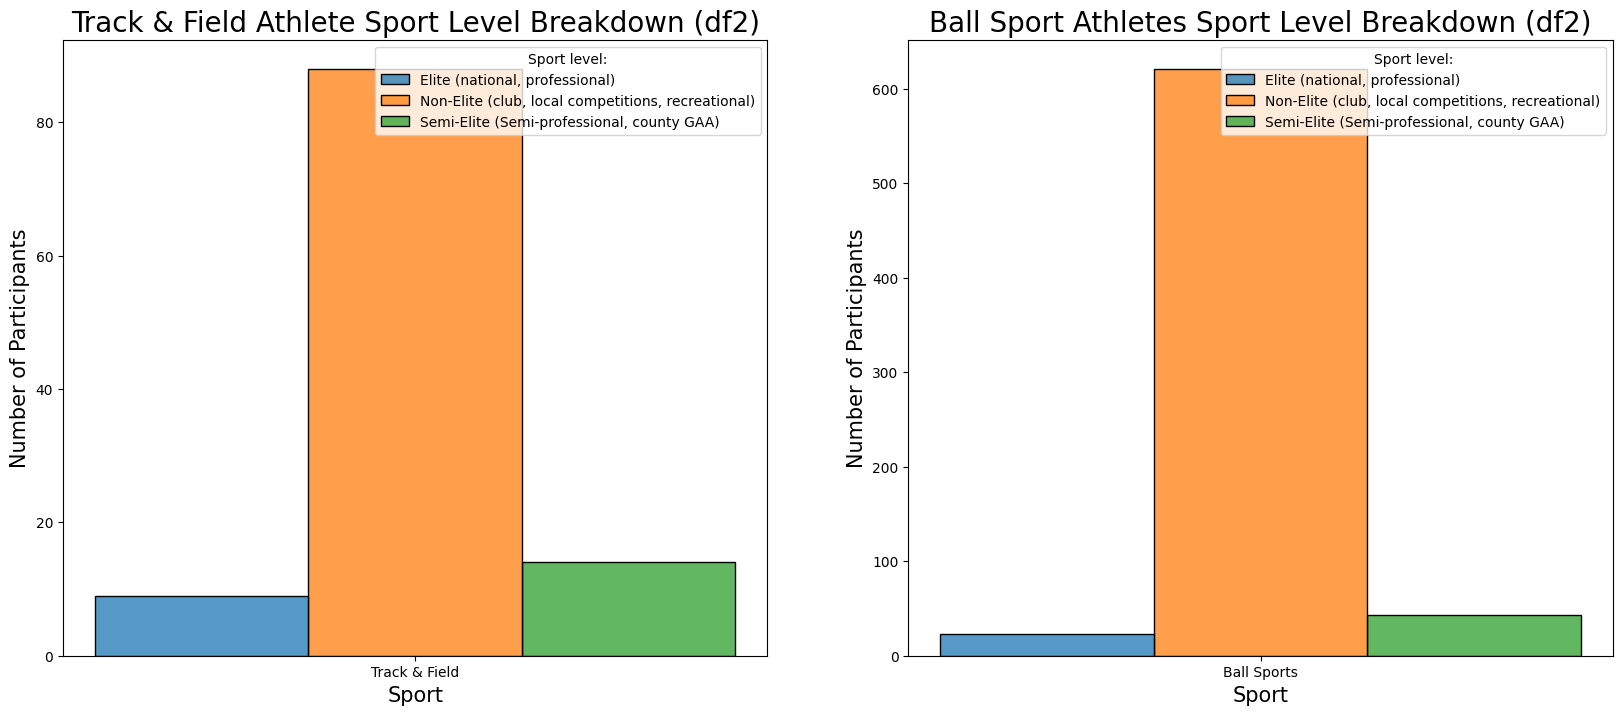

In [68]:
# Create graph showing break down of Elite, Non-Elite and Semi-Elite athlete in (Ball Sports) and (Track & Field) 

fig, ax =plt.subplots(1, 2, figsize=(20,8))

fig=sns.histplot(data=df2[df2['What sport do you primarily play?']=='Track & Field'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[0])
ax[0].set_title('Track & Field Athlete Sport Level Breakdown (df2)', fontsize=20)
ax[0].set_xlabel('Sport', fontsize=15)
ax[0].set_ylabel('Number of Participants', fontsize=15)


fig=sns.histplot(data=df2[df2['What sport do you primarily play?']=='Ball Sports'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1,ax=ax[1])
ax[1].set_title('Ball Sport Athletes Sport Level Breakdown (df2)', fontsize=20)
ax[1].set_xlabel('Sport', fontsize=15)
ax[1].set_ylabel('Number of Participants', fontsize=15)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Participants')

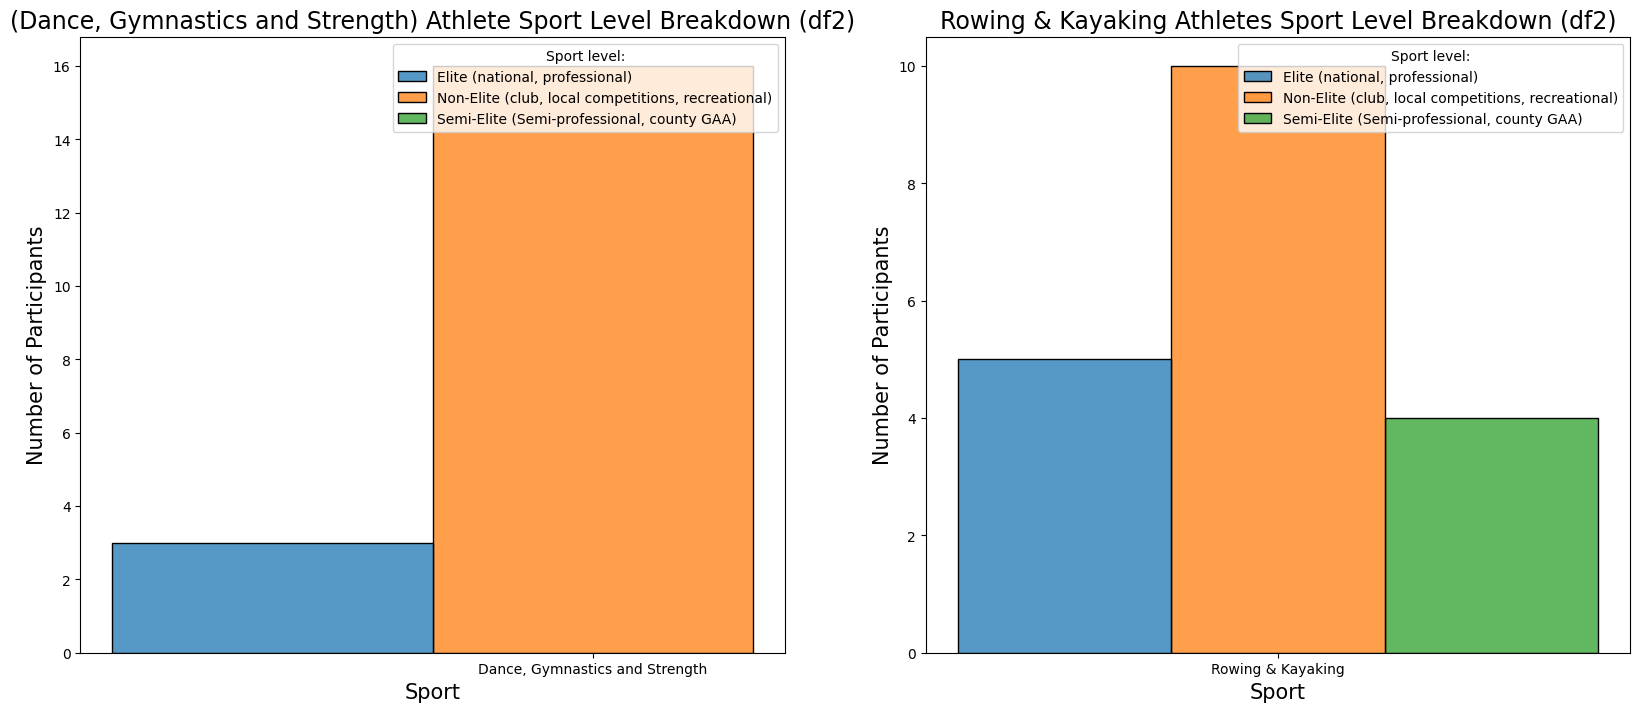

In [69]:
# Create graph showing break down of Elite, Non-Elite and Semi-Elite athlete in (Dance, Gymnastics and Strength) and (Rowing & Kayaking) 

fig, ax =plt.subplots(1, 2, figsize=(20,8))

fig=sns.histplot(data=df2[df2['What sport do you primarily play?']=='Dance, Gymnastics and Strength'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[0])
ax[0].set_title('(Dance, Gymnastics and Strength) Athlete Sport Level Breakdown (df2)',fontsize=17)
ax[0].set_xlabel('Sport', fontsize=15)
ax[0].set_ylabel('Number of Participants', fontsize=15)


fig=sns.histplot(data=df2[df2['What sport do you primarily play?']=='Rowing & Kayaking'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1,ax=ax[1])
ax[1].set_title('Rowing & Kayaking Athletes Sport Level Breakdown (df2)',fontsize=17)
ax[1].set_xlabel('Sport', fontsize=15)
ax[1].set_ylabel('Number of Participants', fontsize=15)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Participants')

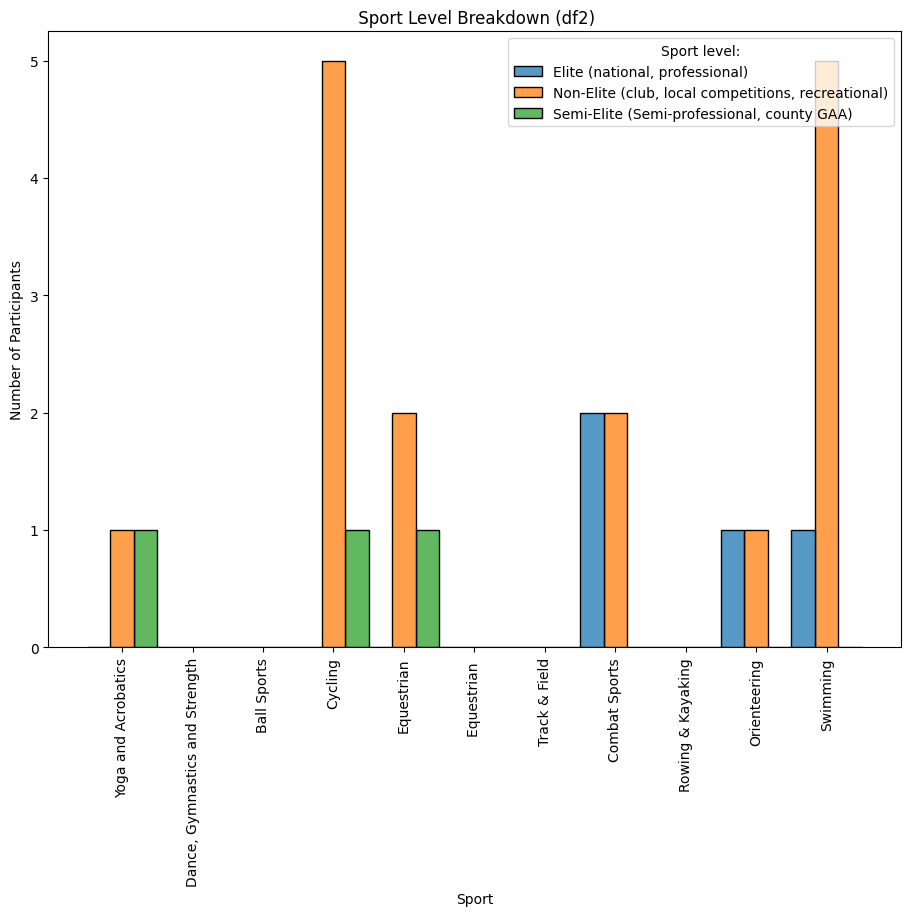

In [70]:
# Create graph showing break down of Elite, Non-Elite and Semi-Elite athlete for the rest of the sports not graphed above

fig, plt.figure(figsize=(11,8))
fig=sns.histplot(data=df2[(df2['What sport do you primarily play?']=='Cycling') |  (df2['What sport do you primarily play?']=='Swimming') | (df2['What sport do you primarily play?']=='Combat Sports') | (df2['What sport do you primarily play?']=='Equestrian') | (df2['What sport do you primarily play?']=='Yoga and Acrobatics') | (df2['What sport do you primarily play?']=='Orienteering')], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1)
fig,plt.xticks(rotation='vertical')
fig.set_title(' Sport Level Breakdown (df2)')
fig.set_xlabel('Sport')
fig.set_ylabel('Number of Participants')

 - There are more athletes competing in (Ball Sports), (Track & Field), (Dance, Gymnastics and Strength) and (Rowing & Kayaking). From most to least there are about ~650 athletes in Ball Sports, ~103 athletes in Track & Field, ~19 athletes in Dance, Gymnastics and Strength and ~19 in Rowing & Kayaking. The rest of the sports have less than 5 participants.
   - In Ball Sports there are about ~610 Non-Elite athletes, ~30 Semi-Elite athletes and ~10 Elite athletes.
   - In Track & Field there are about ~85 Non Elite athletes, ~10 Semi-Elite athletes and ~8 Elite athletes.
   - In Dance, Gymnastics and Strength there are about ~16 Non-Elite athletes and ~3 Elite athletes.
   - Rowing & Kayaking there are about ~10 Non-Elite athletes, ~4 Semi-Elite athletes and ~5 Elite athletes


In [71]:
# Check the diffrent values in 'On average per week, how many hours do you spend participating in your sport?' column
df2['On average per week, how many hours do you spend participating in your sport?'].value_counts()

On average per week, how many hours do you spend participating in your sport?
4.0     548
6.0      38
8.0      32
10.0     30
5.0      30
3.0      22
7.0      20
12.0     15
2.0      15
9.0      14
3.5      12
15.0     10
6.5       9
4.5       7
20.0      6
14.0      6
5.5       5
7.5       5
1.5       4
17.0      3
16.0      3
13.0      3
21.0      2
18.5      2
0.0       2
11.0      2
10.5      2
1.0       2
8.5       2
25.0      2
14.5      1
15.5      1
16.5      1
2.5       1
22.0      1
23.0      1
24.0      1
Name: count, dtype: int64

We need to put the time spent on average a week participating in a sport into time categories for dataframe df2. First, I will change the datatype to 'int', then place each time range in a buffer value. Second, I will change the datatype to 'str', then place buffer value in correct time range slot.

In [72]:
# First I will change the datatype to 'int64' then replace it will a buffer number
df2['On average per week, how many hours do you spend participating in your sport?']=df2['On average per week, how many hours do you spend participating in your sport?'].astype('int64')
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?'] <1,0,df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?'].between(1,5),1,df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?'].between(6,10),2,df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?'].between(7,15),3,df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?'].between(16,20),4,df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?']>20,5,df2['On average per week, how many hours do you spend participating in your sport?'])


# Second change datatype to 'str' and replace it with the proper number ranges 
df2['On average per week, how many hours do you spend participating in your sport?']=df2['On average per week, how many hours do you spend participating in your sport?'].astype('str')
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?']== '0','<1',df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?']== '1','1-5',df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?']== '2','6-10',df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?']== '3','11-15',df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?']== '4','16-20',df2['On average per week, how many hours do you spend participating in your sport?'])
df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(df2['On average per week, how many hours do you spend participating in your sport?']== '5','20+',df2['On average per week, how many hours do you spend participating in your sport?'])


In [73]:
# Change the datatype back to categorical 
df2['On average per week, how many hours do you spend participating in your sport?']=df2['On average per week, how many hours do you spend participating in your sport?'].astype('category')

# Check to see if everything is categorized correctly 
(df2['On average per week, how many hours do you spend participating in your sport?'].value_counts())


On average per week, how many hours do you spend participating in your sport?
1-5      646
6-10     152
11-15     38
16-20     15
20+        7
<1         2
Name: count, dtype: int64

Create a plot that showcases the number of athletes that are in rule-bound/structured sports and how many hours these athletes practice.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(<Axes: title={'center': 'Number of athletes in structure/rule-bound sports & the average number of hours practicing per week'}, xlabel='Average hours practicing per week', ylabel='Number of Athletes'>,
 <matplotlib.legend.Legend at 0x7839e79947f0>)

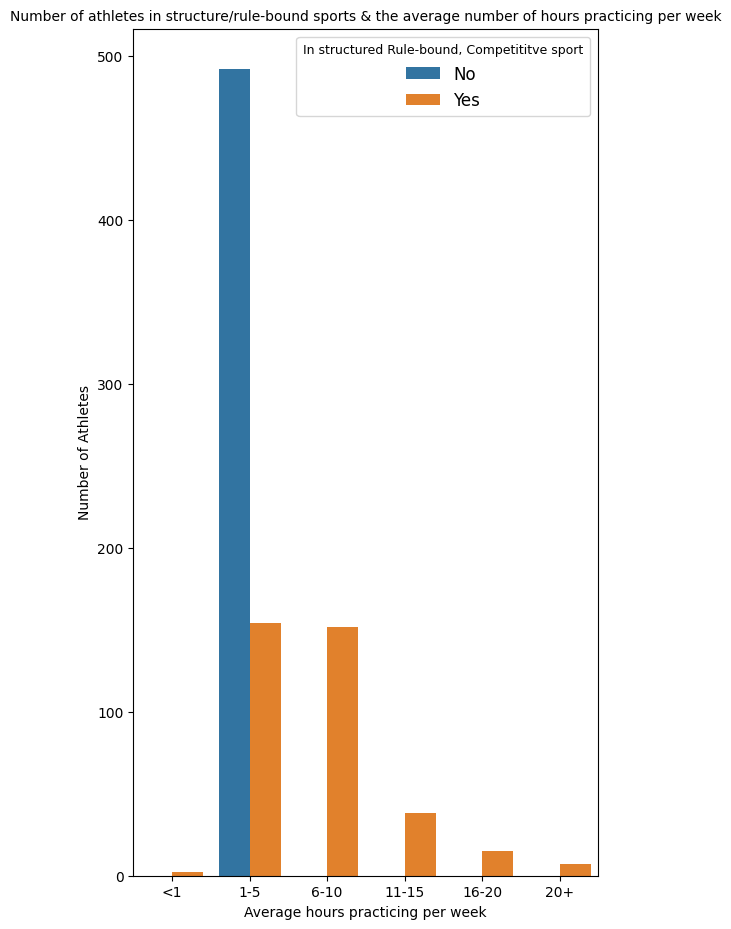

In [74]:
fig,plt.figure(figsize=(6,11))
hours_order =['<1', '1-5','6-10', '11-15','16-20','20+' ]
fig=sns.countplot(data=df2, x='On average per week, how many hours do you spend participating in your sport?',hue='Are you an athlete involved in a structured, rule-bound, competitive physical activity?',order=hours_order)
fig.set_title('Number of athletes in structure/rule-bound sports & the average number of hours practicing per week', fontsize=10)
fig.set_xlabel('Average hours practicing per week')
fig.set_ylabel('Number of Athletes')
fig,plt.legend(title="In structured Rule-bound, Competititve sport", fontsize=12, title_fontsize=9)

- We can see from this graph that about ~490 individuals are not in a structured, rule-bound sport and they also are the individuals that only spend between (1-5) hours a week practicing. 
- We can also see that those in structured sports, most athletes, about ~150 individuals practice between (1-5) hours and ~150 individuals practice between (6-10) hours per week. 

Create a stacked histplot that shows athletes in different sport levels and how many of them have goals related to sports

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Athletes')

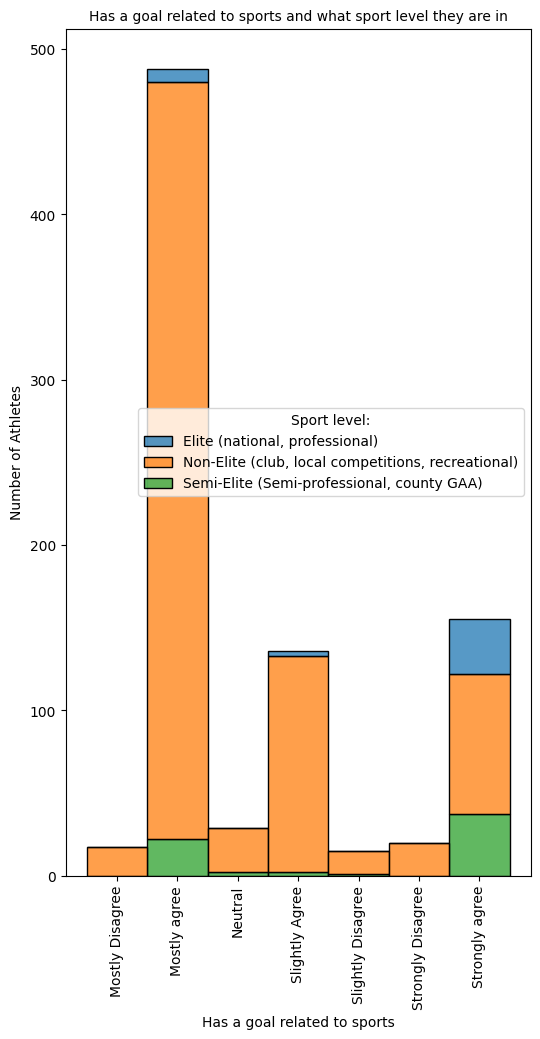

In [75]:
#Create a plot that shows the comparison between the athletes diffrent sport levels and if they have goals related to sports
fig,plt.figure(figsize=(6,11))
fig=sns.histplot(data=df2, x='I have many goals related to sport',hue='Sport level:',multiple='stack')
fig.set_title('Has a goal related to sports and what sport level they are in', fontsize=10)
fig.set_xlabel('Has a goal related to sports')
fig,plt.xticks(rotation='vertical')
fig.set_ylabel('Number of Athletes')

- From this graph we can see that all of the Elite professional athletes have some kind of goal related to sports, with most of the athletes strongly agreeing to having a goal. 
- Now those athletes that are semi-professionals vary between strongly agree to neutral. But most of the semi-pros strongly agree.
- As for the Non-Elite athletes, their answers very between the different categories. But the majority Mostly Agree.

Create subplots to showcase athletes in the diffrent sport levels and where they live

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

[Text(1.0, 0, 'Belgium'),
 Text(2.0, 0, 'France'),
 Text(4.0, 0, 'New Zealand'),
 Text(5.0, 0, 'Sweden'),
 Text(6.0, 0, 'Thailand')]

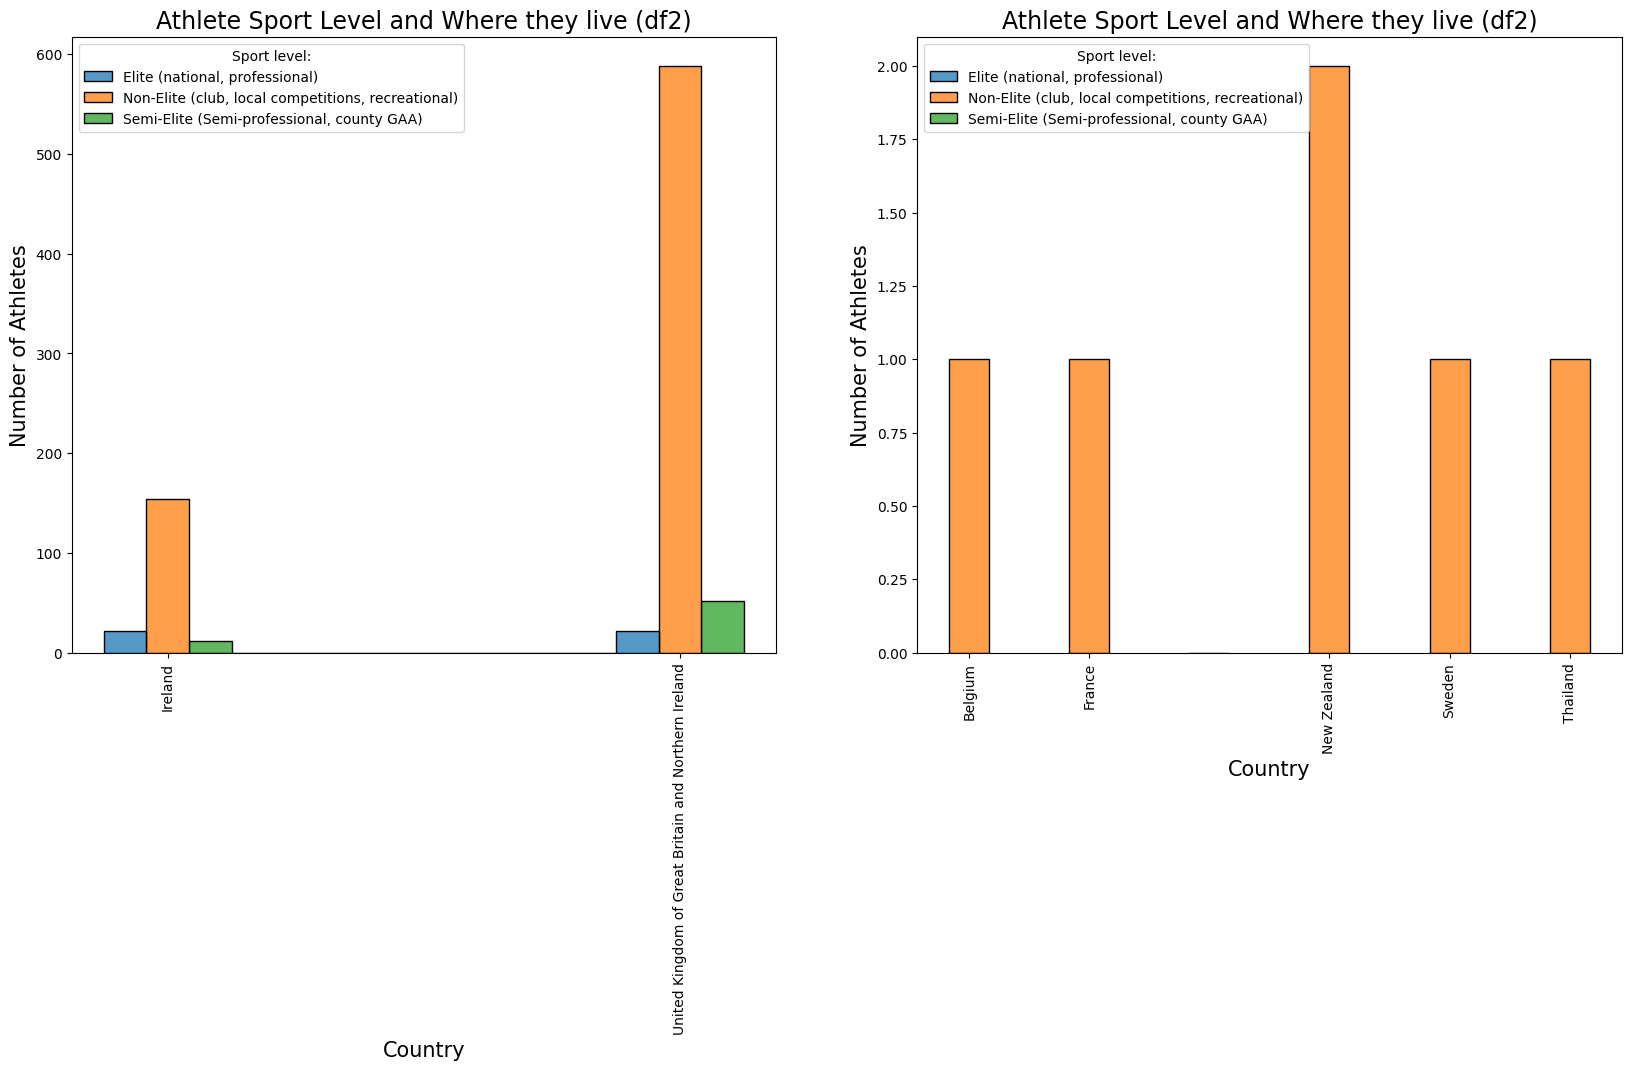

In [76]:
# Create histplot that shows the diffrent athletes in different sport levels and where they live
fig, ax= plt.subplots(1,2,figsize=(20,8))
fig=sns.histplot(data=df2[(df2['In what country do you live?']== 'United Kingdom of Great Britain and Northern Ireland') | (df2['In what country do you live?']== 'Ireland')], x='In what country do you live?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[0])

ax[0].set_title('Athlete Sport Level and Where they live (df2)',fontsize=17)
ax[0].set_xlabel('Country', fontsize=15)
ax[0].set_ylabel('Number of Athletes', fontsize=15)
x=['United Kingdom of Great Britain and Northern Ireland', 'Ireland']
ax[0].set_xticks(x)
ax[0].set_xticklabels(['United Kingdom of Great Britain and Northern Ireland', 'Ireland'],rotation='vertical')

fig=sns.histplot(data=df2[(df2['In what country do you live?']== 'Ausralia') | (df2['In what country do you live?']== 'Belgium') | (df2['In what country do you live?']== 'France') | (df2['In what country do you live?']== 'New Zealand') | (df2['In what country do you live?']== 'Sweden') | (df2['In what country do you live?']== 'Thailand')], x='In what country do you live?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_title('Athlete Sport Level and Where they live (df2)',fontsize=17)
ax[1].set_xlabel('Country', fontsize=15)
ax[1].set_ylabel('Number of Athletes', fontsize=15)
x=['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand']
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand'],rotation='vertical')

In the graph above, with the dataset we filled nulls with the mode we see that:
1. Most of the athletes participating in this survey are from the UK and Ireland. The other counties only have at most two participants. 
2. In the Uk most of the athletes are Non-Elite athletes (590), Semi-Elite athletes (50) and last Elite athletes (~25). 
3. In Ireland there are about ~159 Non-Elite athletes, about ~12.5 Semi-Elite athletes and about ~25 Elite athletes.

Create subplots that showcase if an athlete has a mental health condition and where they are located

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

[Text(1.0, 0, 'Belgium'),
 Text(2.0, 0, 'France'),
 Text(4.0, 0, 'New Zealand'),
 Text(5.0, 0, 'Sweden'),
 Text(6.0, 0, 'Thailand')]

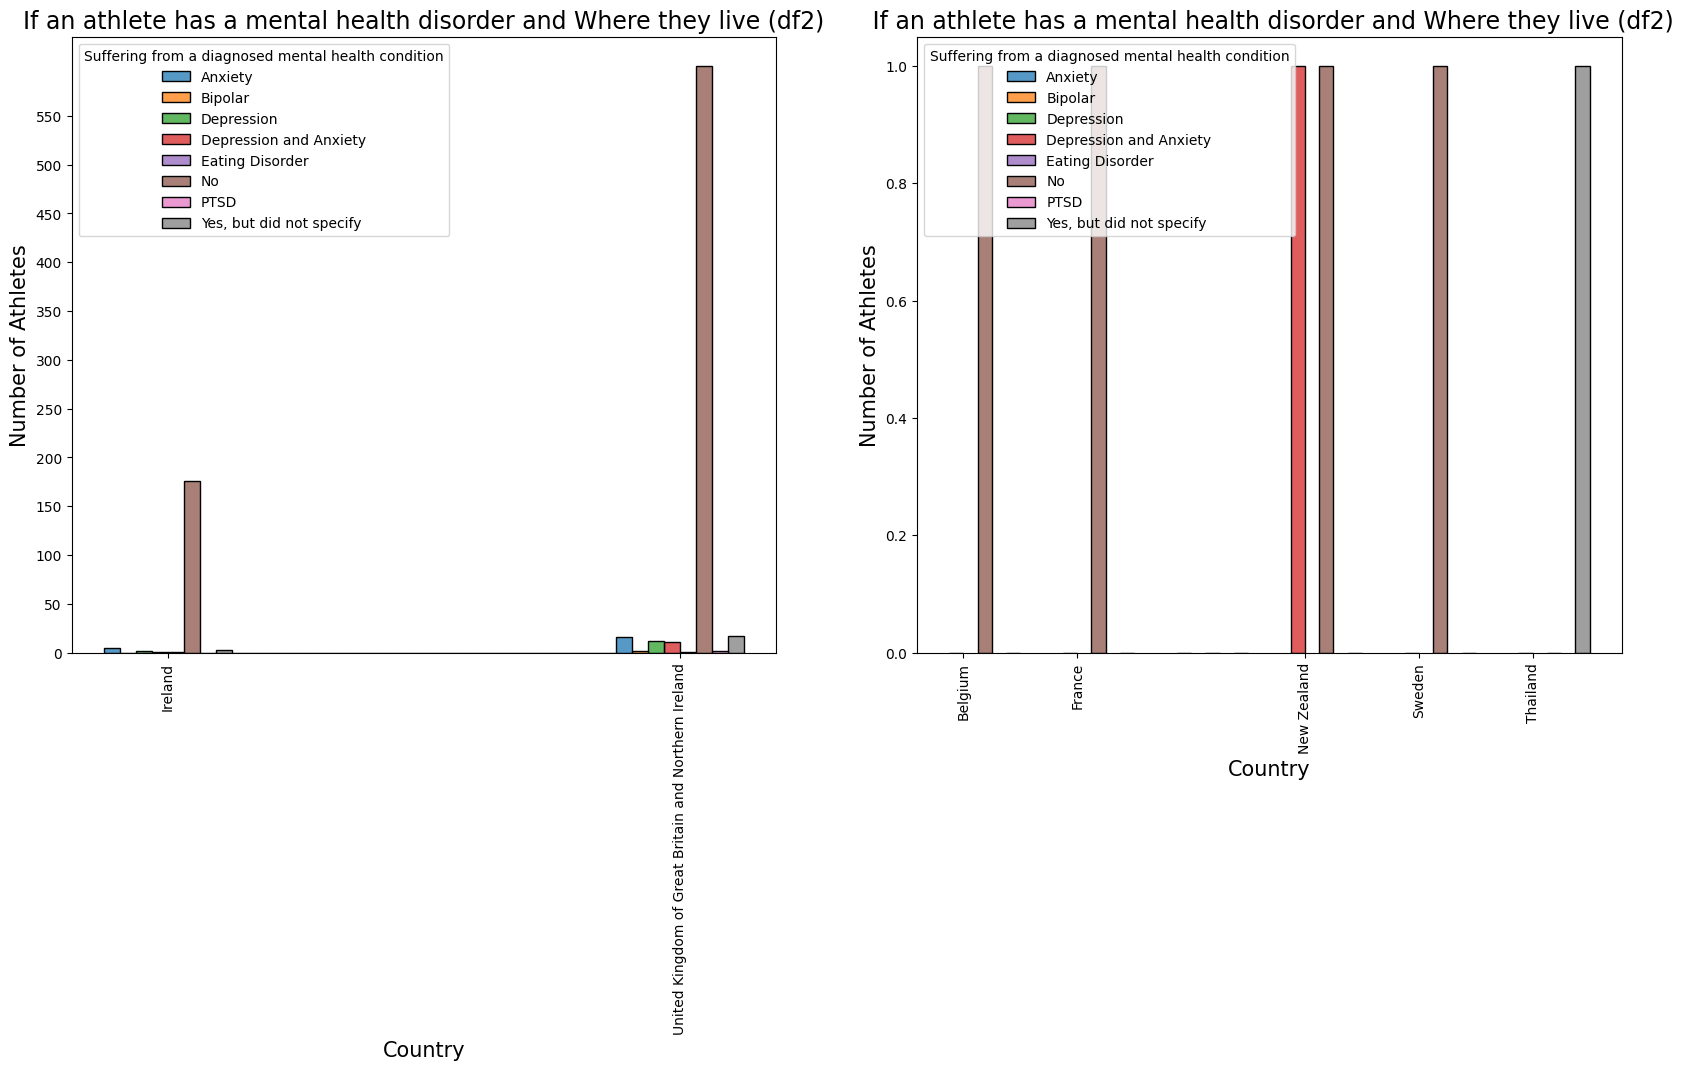

In [77]:
# Create histplot that shows if an athlete has a mental health condition and where they are located
fig, ax= plt.subplots(1,2,figsize=(20,8))
fig=sns.histplot(data=df2[(df2['In what country do you live?']== 'United Kingdom of Great Britain and Northern Ireland') | (df2['In what country do you live?']== 'Ireland')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[0])

ax[0].set_title('If an athlete has a mental health disorder and Where they live (df2)',fontsize=17)
ax[0].set_xlabel('Country', fontsize=15)
ax[0].set_ylabel('Number of Athletes', fontsize=15)
x=['United Kingdom of Great Britain and Northern Ireland', 'Ireland']
ax[0].set_xticks(x)
ax[0].set_xticklabels(['United Kingdom of Great Britain and Northern Ireland', 'Ireland'],rotation='vertical')
ax[0].set_yticks(np.arange(0, 600, 50)) 

fig=sns.histplot(data=df2[(df2['In what country do you live?']== 'Ausralia') | (df2['In what country do you live?']== 'Belgium') | (df2['In what country do you live?']== 'France') | (df2['In what country do you live?']== 'New Zealand') | (df2['In what country do you live?']== 'Sweden') | (df2['In what country do you live?']== 'Thailand')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_title(' If an athlete has a mental health disorder and Where they live (df2)',fontsize=17)
ax[1].set_xlabel('Country', fontsize=15)
ax[1].set_ylabel('Number of Athletes', fontsize=15)
x=['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand']
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand'],rotation='vertical')

We see that most athletes are located in 'Ireland' and the 'UK'. So below I will create a subplot that focuses on both of these contries, so we can see the bigger picture of athletes with a mental health condition in these contries. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Athletes')

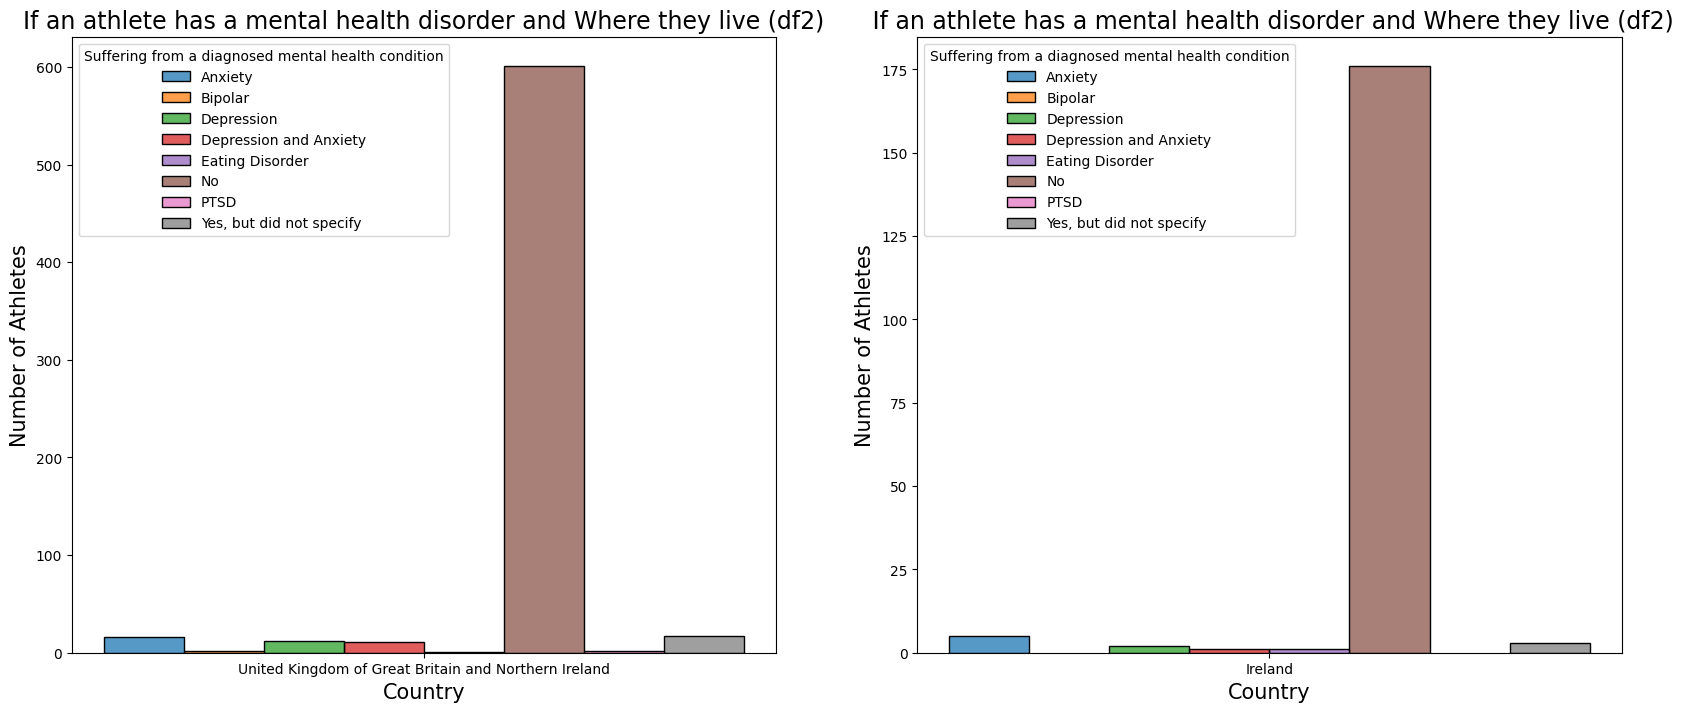

In [78]:
# Create hisplot that shows the diffrent mental health conditions of athletes that live in 'Ireland' and the 'UK'
fig, ax= plt.subplots(1,2,figsize=(20,8))
fig=sns.histplot(data=df2[(df2['In what country do you live?']== 'United Kingdom of Great Britain and Northern Ireland')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[0])

ax[0].set_title('If an athlete has a mental health disorder and Where they live (df2)',fontsize=17)
ax[0].set_xlabel('Country', fontsize=15)
ax[0].set_ylabel('Number of Athletes', fontsize=15)


fig=sns.histplot(data=df2[(df2['In what country do you live?']== 'Ireland')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_title(' If an athlete has a mental health disorder and Where they live (df2)',fontsize=17)
ax[1].set_xlabel('Country', fontsize=15)
ax[1].set_ylabel('Number of Athletes', fontsize=15)


From the graph above we see:
- Countries Belgium, France, New Zealand, Sweden and Thailand only contain 2 or less individuals in this survey and almost all of them have no mental health disorder except for 2.
- The Countries with the most individuals in this survey are UK and Ireland. 
- In the UK most people about ~600 have no mental health disorder. Those falling under ~25 people in order from most to least are Anxiety, Has a mental health disorder but did not specify what that was, Depression and Depression & Anxiety. 
- In Ireland most people about ~175 have not mental health disorder. Those falling under ~25 people in order from most to least are have Anxiety, Has a mental health disorder but did not specify what that was, Depression and Depression & Anxiety. 



#### Graphing Nona_df2 Dataset
Now we will create graphs for the nona_df2 dataset (where all missing values were dropped). We want to see if there is a big diffrence between that of the dataset df2 where we replaced all missing values with the 'mode'.

For dataset nona_df2 I will clump sports together in 7 categories just as I did with dataset df2 ('Track & Field','Ball sports', 'Dance, Gymnastics and Strength','Combat Sports','Rowing & Kayaking' and 'Yoga and Acrobatics'). 

In [79]:
# For dataset nona_df2 column 'What sport do you play?' clump sports in 7 categories ('Track & Field','Ball sports', 'Dance, Gymnastics and Strength','Combat Sports','Rowing & Kayaking' and 'Yoga and Acrobatics'). Replace origial sport names with these diffrent categories

nona_df2['What sport do you primarily play?'] = nona_df2['What sport do you primarily play?'].replace({'Running (long distance)':'Track & Field','Running (med distance)':'Track & Field','Running (sprinting)':'Track & Field','High Jump':'Track & Field','Long Jump':'Track & Field','Hurdles - athletics':'Track & Field','triathlon':'Track & Field','Triathlon':'Track & Field','Shot put':'Track & Field'})

nona_df2['What sport do you primarily play?'] = nona_df2['What sport do you primarily play?'].replace({'Soccer':'Ball Sports','Gaelic football':'Ball Sports','Golf':'Ball Sports','Squash':'Ball Sports','Waterpolo':'Ball Sports','Camogie':'Ball Sports','Touch Rugby':'Ball Sports','Dodgeball':'Ball Sports','Netball':'Ball Sports','Football':'Ball Sports','Tennis':'Ball Sports','Rugby':'Ball Sports','Hockey':'Ball Sports','Hurling':'Ball Sports','Wheelchair rugby':'Ball Sports','Cricket':'Ball Sports', 'Racketball':'Ball Sports'})

nona_df2['What sport do you primarily play?'] = nona_df2['What sport do you primarily play?'].replace({'Dancing':'Dance, Gymnastics and Strength','Dance':'Dance, Gymnastics and Strength','Crossfit':'Dance, Gymnastics and Strength','Weight-lifting':'Dance, Gymnastics and Strength','Weightlifting for personal goals':'Dance, Gymnastics and Strength','Powerlifting':'Dance, Gymnastics and Strength','CrossFit':'Dance, Gymnastics and Strength','Bodybuilding':'Dance, Gymnastics and Strength'})

nona_df2['What sport do you primarily play?'] = nona_df2['What sport do you primarily play?'].replace({'Kickboxing':'Combat Sports','Judo':'Combat Sports','Karate':'Combat Sports'})

nona_df2['What sport do you primarily play?'] = nona_df2['What sport do you primarily play?'].replace({'Rowing':'Rowing & Kayaking','Kayaking':'Rowing & Kayaking'})

nona_df2['What sport do you primarily play?'] = nona_df2['What sport do you primarily play?'].replace({'Aerial acrobatics':'Yoga and Acrobatics','Ashtanga yoga and acrobatics':'Yoga and Acrobatics','Equestrian sport':'Equestrian','Equestrian':'Equestrian', 'Equestrian':'Equestrian'})

/tmp/ipykernel_32/2332180405.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nona_df2['What sport do you primarily play?'] = nona_df2['What sport do you primarily play?'].replace({'Running (long distance)':'Track & Field','Running (med distance)':'Track & Field','Running (sprinting)':'Track & Field','High Jump':'Track & Field','Long Jump':'Track & Field','Hurdles - athletics':'Track & Field','triathlon':'Track & Field','Triathlon':'Track & Field','Shot put':'Track & Field'})
/tmp/ipykernel_32/2332180405.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nona_

In [80]:
#Drop all null values 
nona_df2=nona_df2.dropna(axis=0)

nona_df2.isna().sum()

Respondent ID                                                                                                   0
Gender:                                                                                                         0
Age Group:                                                                                                      0
In what country do you live?                                                                                    0
Suffering from a diagnosed mental health condition                                                              0
Occupation                                                                                                      0
Marital Status                                                                                                  0
Are you a smoker?                                                                                               0
Do you eat 5 or more portions of fruit and vegetables per day?                          

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Participants')

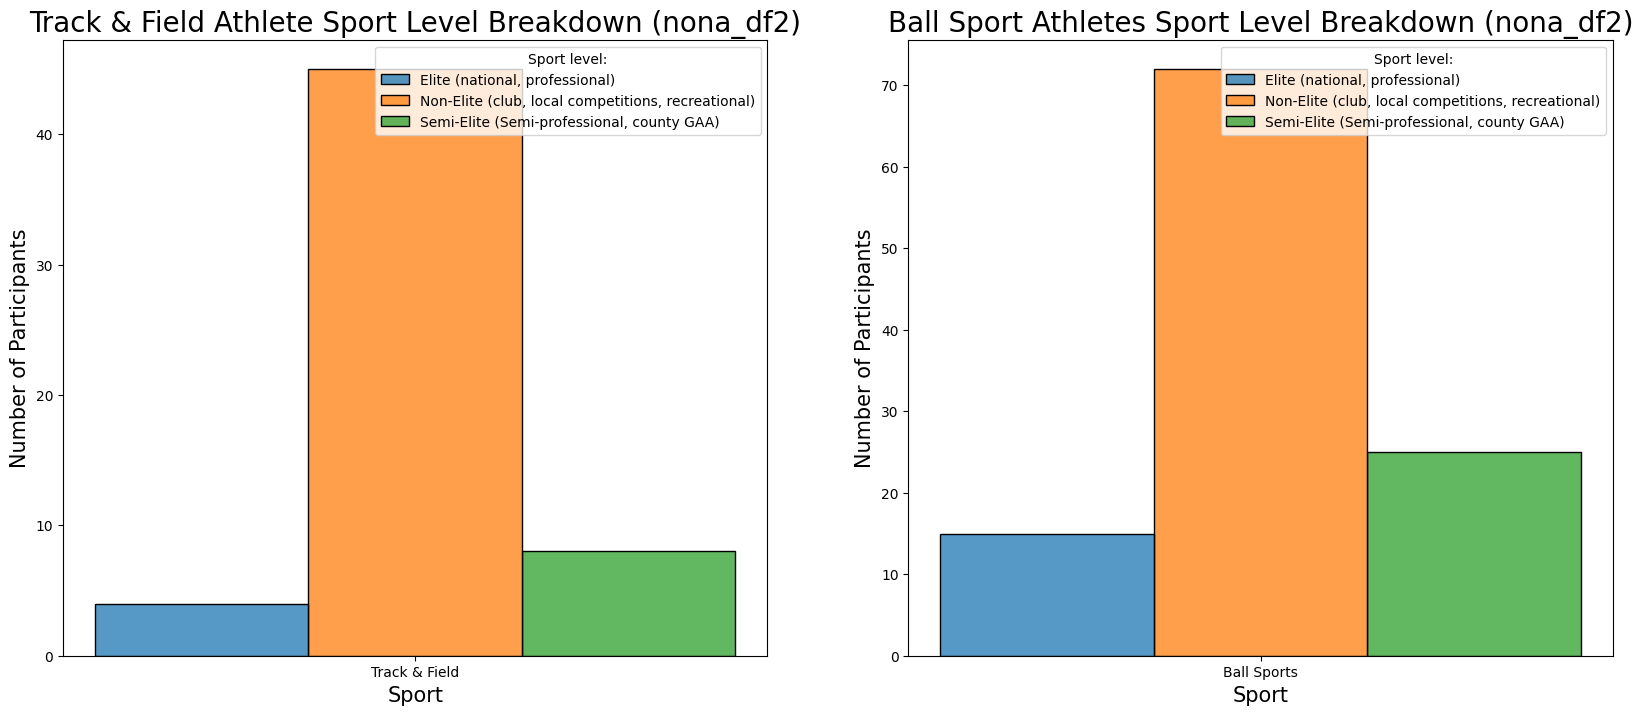

In [81]:
# Create graph showing break down of Elite, Non-Elite and Semi-Elite athlete in (Ball Sports) and (Track & Field) 

fig, ax =plt.subplots(1, 2, figsize=(20,8))

fig=sns.histplot(data=nona_df2[nona_df2['What sport do you primarily play?']=='Track & Field'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[0])
ax[0].set_title('Track & Field Athlete Sport Level Breakdown (nona_df2)', fontsize=20)
ax[0].set_xlabel('Sport', fontsize=15)
ax[0].set_ylabel('Number of Participants', fontsize=15)


fig=sns.histplot(data=nona_df2[nona_df2['What sport do you primarily play?']=='Ball Sports'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1,ax=ax[1])
ax[1].set_title('Ball Sport Athletes Sport Level Breakdown (nona_df2)', fontsize=20)
ax[1].set_xlabel('Sport', fontsize=15)
ax[1].set_ylabel('Number of Participants', fontsize=15)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Participants')

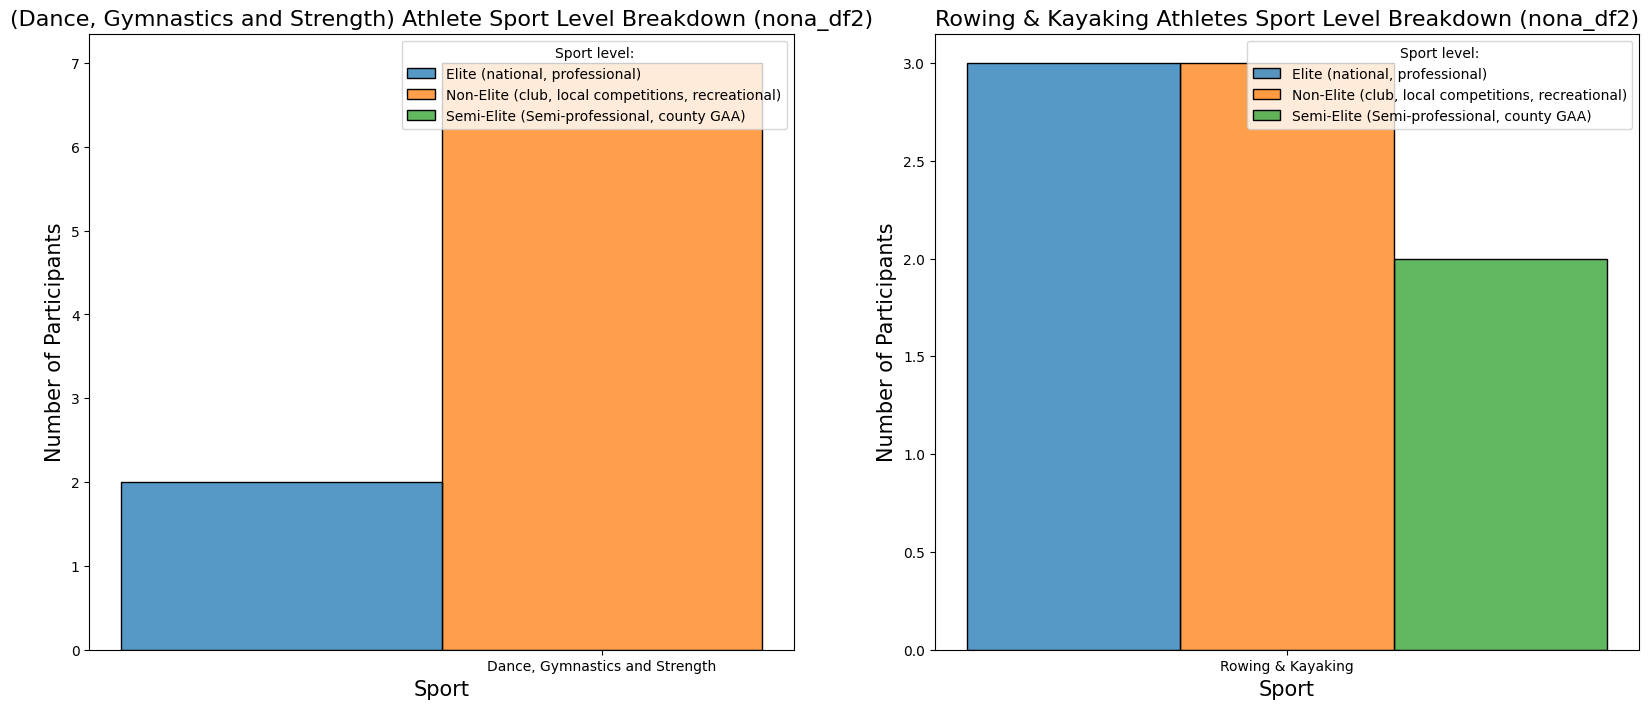

In [82]:
# Create graph showing break down of Elite, Non-Elite and Semi-Elite athlete in (Dance, Gymnastics and Strength) and (Rowing & Kayaking) 

fig, ax =plt.subplots(1, 2, figsize=(20,8))

fig=sns.histplot(data=nona_df2[nona_df2['What sport do you primarily play?']=='Dance, Gymnastics and Strength'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[0])
ax[0].set_title('(Dance, Gymnastics and Strength) Athlete Sport Level Breakdown (nona_df2)',fontsize=16)
ax[0].set_xlabel('Sport', fontsize=15)
ax[0].set_ylabel('Number of Participants', fontsize=15)


fig=sns.histplot(data=nona_df2[nona_df2['What sport do you primarily play?']=='Rowing & Kayaking'], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1,ax=ax[1])
ax[1].set_title('Rowing & Kayaking Athletes Sport Level Breakdown (nona_df2)',fontsize=16)
ax[1].set_xlabel('Sport', fontsize=15)
ax[1].set_ylabel('Number of Participants', fontsize=15)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

Text(0, 0.5, 'Number of Participants')

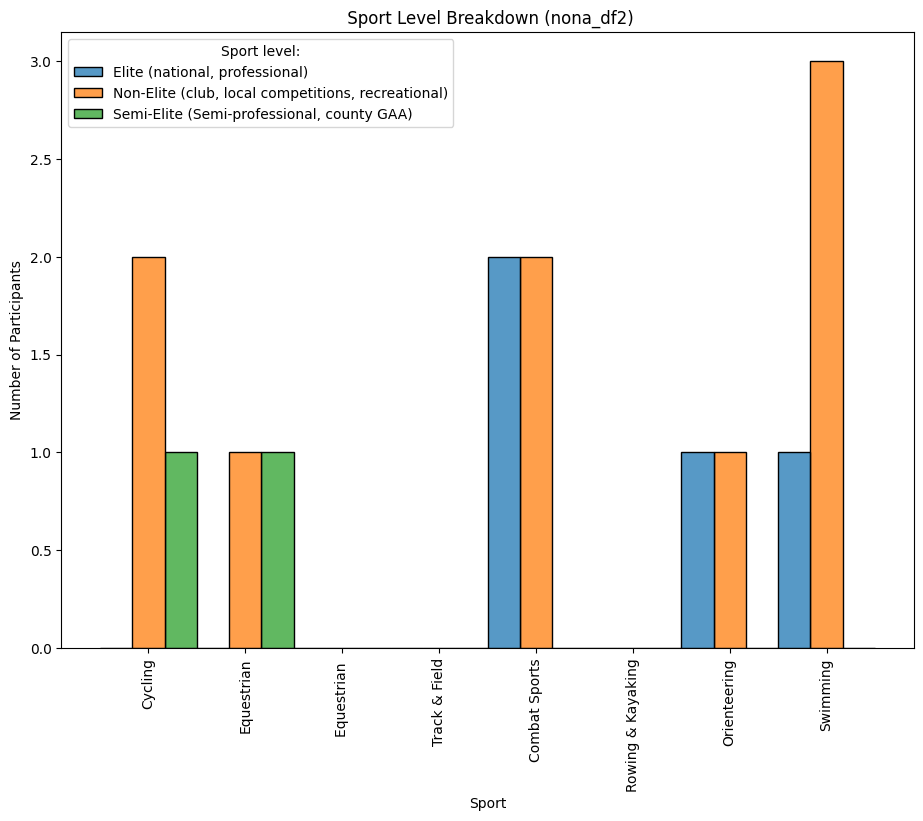

In [83]:
# Create graph showing break down of Elite, Non-Elite and Semi-Elite athlete for the rest of the sports not graphed above

fig, plt.figure(figsize=(11,8))
fig=sns.histplot(data=nona_df2[(nona_df2['What sport do you primarily play?']=='Cycling') |  (nona_df2['What sport do you primarily play?']=='Swimming') | (nona_df2['What sport do you primarily play?']=='Combat Sports') | (nona_df2['What sport do you primarily play?']=='Equestrian') | (nona_df2['What sport do you primarily play?']=='Yoga and Acrobatics') | (nona_df2['What sport do you primarily play?']=='Orienteering')], x='What sport do you primarily play?', hue='Sport level:',multiple='dodge', discrete=1)
fig,plt.xticks(rotation='vertical')
fig.set_title(' Sport Level Breakdown (nona_df2)')
fig.set_xlabel('Sport')
fig.set_ylabel('Number of Participants')


- There are more athletes competing in (Ball Sports), (Track & Field), (Dance, Gymnastics and Strength) and (Rowing & Kayaking). From most to least there are about ~110 athletes in Ball Sports, ~53 athletes in Track & Field,  ~9 athletes in Dance, Gymnastics and Strength and ~8 athletes in Rowing & Kayaking . The rest of the sports have less than 3 participants.
- In Ball Sports there are about ~70 Non-Elite athletes, ~25 Semi-Elite athletes and ~15 Elite athletes.
- In Track & Field there are about ~45 Non Elite athletes, ~5 Semi-Elite atheltes and ~3 Elite atheltes.
- In Dance, Gymnastics and Stregth there are about ~7 Non-Elite athletes and ~2 Elite athletes.
- In Rowing & Kayaking there ae about ~3 Non-Elite athletes, ~2 Semi-Elite athletes and ~3 Elite athletes. 

We need to put the time spent on average a week participating in a sport into time categories for dataframe nona_df2. First, I will change the datatype to 'int', then place each time range in a buffer value. Second, I will change the datatype to 'str', then place buffer value in correct time range slot.

In [84]:
nona_df2['On average per week, how many hours do you spend participating in your sport?'].value_counts()

On average per week, how many hours do you spend participating in your sport?
4.0     28
8.0     24
6.0     21
10.0    17
5.0     15
3.0     14
2.0     11
7.0     10
3.5      9
12.0     6
6.5      5
15.0     5
20.0     4
9.0      4
14.0     4
4.5      3
16.0     3
7.5      3
21.0     2
0.0      2
11.0     1
10.5     1
24.0     1
22.0     1
1.5      1
2.5      1
18.5     1
25.0     1
15.5     1
8.5      1
14.5     1
1.0      1
5.5      0
17.0     0
23.0     0
13.0     0
16.5     0
Name: count, dtype: int64

In [85]:
# First I will change the datatype to 'object', then fill the nulls with -1, then change datatype to 'int64' and replace categorized numbers with buffer numbers
nona_df2['On average per week, how many hours do you spend participating in your sport?']=nona_df2['On average per week, how many hours do you spend participating in your sport?'].astype(object)
nona_df2['On average per week, how many hours do you spend participating in your sport?']=nona_df2['On average per week, how many hours do you spend participating in your sport?'].fillna('-1')
nona_df2['On average per week, how many hours do you spend participating in your sport?']=nona_df2['On average per week, how many hours do you spend participating in your sport?'].astype('int64')
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']==0,0,nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?'].between(1,5),1,nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?'].between(6,10),2,nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?'].between(7,15),3,nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?'].between(16,20),4,nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']>20,5,nona_df2['On average per week, how many hours do you spend participating in your sport?'])


/tmp/ipykernel_32/2631464563.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nona_df2['On average per week, how many hours do you spend participating in your sport?']=nona_df2['On average per week, how many hours do you spend participating in your sport?'].fillna('-1')


In [86]:
# Check to see if everything is categorized correctly 
nona_df2['On average per week, how many hours do you spend participating in your sport?'].value_counts()

On average per week, how many hours do you spend participating in your sport?
2    86
1    83
3    18
4     8
5     5
0     2
Name: count, dtype: int64

In [87]:
# Second change datatype to 'str' and replace it with the proper number ranges 
nona_df2['On average per week, how many hours do you spend participating in your sport?']=nona_df2['On average per week, how many hours do you spend participating in your sport?'].astype('str')
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']== '0','<1',nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']== '1','1-5',nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']== '2','6-10',nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']== '3','11-15',nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']== '4','16-20',nona_df2['On average per week, how many hours do you spend participating in your sport?'])
nona_df2['On average per week, how many hours do you spend participating in your sport?'] = np.where(nona_df2['On average per week, how many hours do you spend participating in your sport?']== '5','20+',nona_df2['On average per week, how many hours do you spend participating in your sport?'])

In [88]:
# Check to see if everything is categorized correctly 
nona_df2['On average per week, how many hours do you spend participating in your sport?'].value_counts()


On average per week, how many hours do you spend participating in your sport?
6-10     86
1-5      83
11-15    18
16-20     8
20+       5
<1        2
Name: count, dtype: int64

In [89]:
# Change the '-1' back to nulls
nona_df2['On average per week, how many hours do you spend participating in your sport?']=nona_df2['On average per week, how many hours do you spend participating in your sport?'].replace({'-1': np.nan})

# Change the datatype back to categorical 
nona_df2['On average per week, how many hours do you spend participating in your sport?']=nona_df2['On average per week, how many hours do you spend participating in your sport?'].astype('category')

# Check to see if everything is categorized correctly 
nona_df2['On average per week, how many hours do you spend participating in your sport?'].value_counts()

On average per week, how many hours do you spend participating in your sport?
6-10     86
1-5      83
11-15    18
16-20     8
20+       5
<1        2
Name: count, dtype: int64

Create a plot that showcases the number of athletes that are in rule-bound/structured sports and how many hours these athletes practice.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(<Axes: title={'center': 'Number of athletes in structure/rule-bound sports & the average number of hours practicing per week'}, xlabel='Averaage hours practicing per week', ylabel='Number of Athletes'>,
 <matplotlib.legend.Legend at 0x7839e72ab400>)

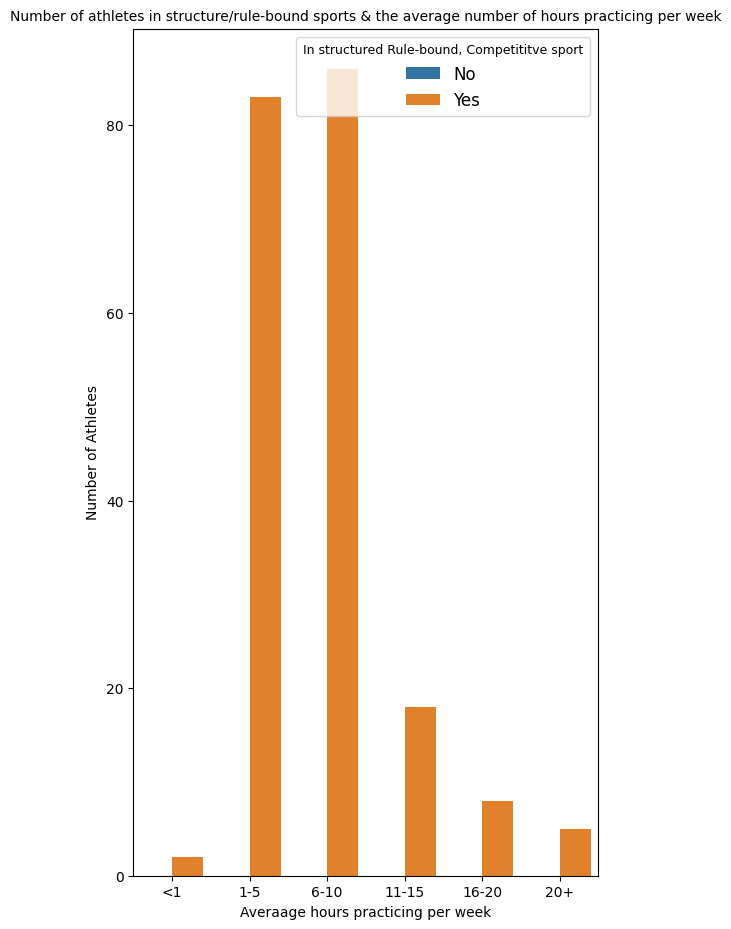

In [90]:
fig,plt.figure(figsize=(6,11))
hours_order =['<1', '1-5','6-10', '11-15','16-20','20+' ]
fig=sns.countplot(data=nona_df2, x='On average per week, how many hours do you spend participating in your sport?',order=hours_order,hue='Are you an athlete involved in a structured, rule-bound, competitive physical activity?')
fig.set_title('Number of athletes in structure/rule-bound sports & the average number of hours practicing per week (nona_df2)', fontsize=10)
fig.set_xlabel('Averaage hours practicing per week')
fig.set_ylabel('Number of Athletes')
fig,plt.legend(title="In structured Rule-bound, Competititve sport", fontsize=12, title_fontsize=9, labels=['No', 'Yes'])

- We see from this graph that all the individuals in nonadf2 dataset are in structured/rule-bound sports. 
- But the most number of individuals, about ~85 individuals practice between (6-10) hours a week, and about ~83 individuals practice between (1-5) hours a week.

Create a stacked histplot that shows athletes in different sport levels and how many of them have goals related to sports

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

(Text(0, 0.5, 'Number of Athletes'),)

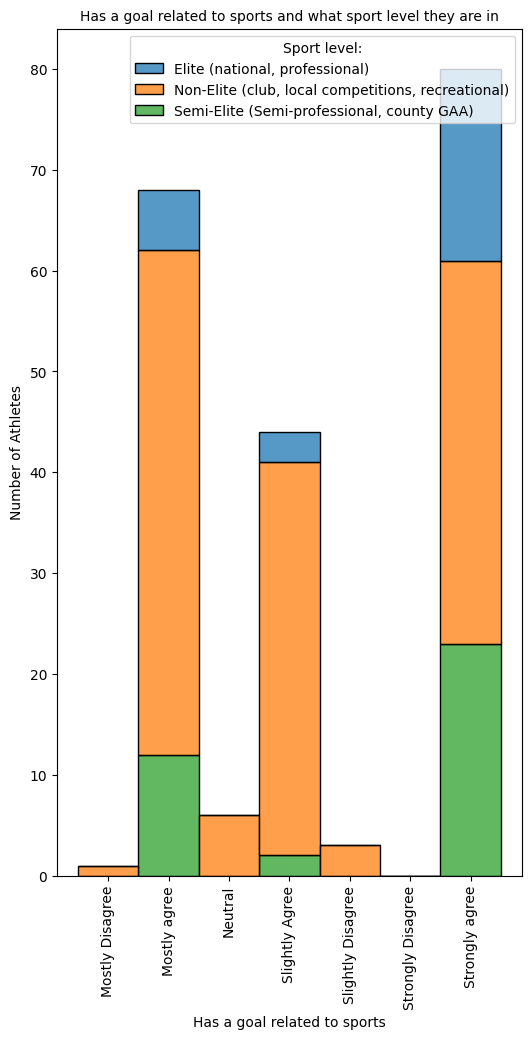

In [91]:
#Create a plot that shows the comparison between the athletes diffrent sport levels and if they have goals related to sports
fig,plt.figure(figsize=(6,11))
fig=sns.histplot(data=nona_df2, x='I have many goals related to sport',hue='Sport level:',multiple='stack')
fig.set_title('Has a goal related to sports and what sport level they are in', fontsize=10)
fig.set_xlabel('Has a goal related to sports')
fig,plt.xticks(rotation='vertical')
fig.set_ylabel('Number of Athletes'),

- From this graph we can see that all of the Elite professional athletes have some kind of goal related to sports, with most of the athletes strongly agreeing to having a goal. 
- Now those athletes that are semi-professionals vary between strongly agree to slightly disagree. But most of the semi-pros strongly agree.
- As for the Non-Elite athletes, their answers very between the different categories. But the majority Mostly Agree, Strongly Agree and Slightly Agree.

Create subplots to showcase athletes in the diffrent sport levels and where they live

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

ConversionError: Failed to convert value(s) to axis units: ['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand']

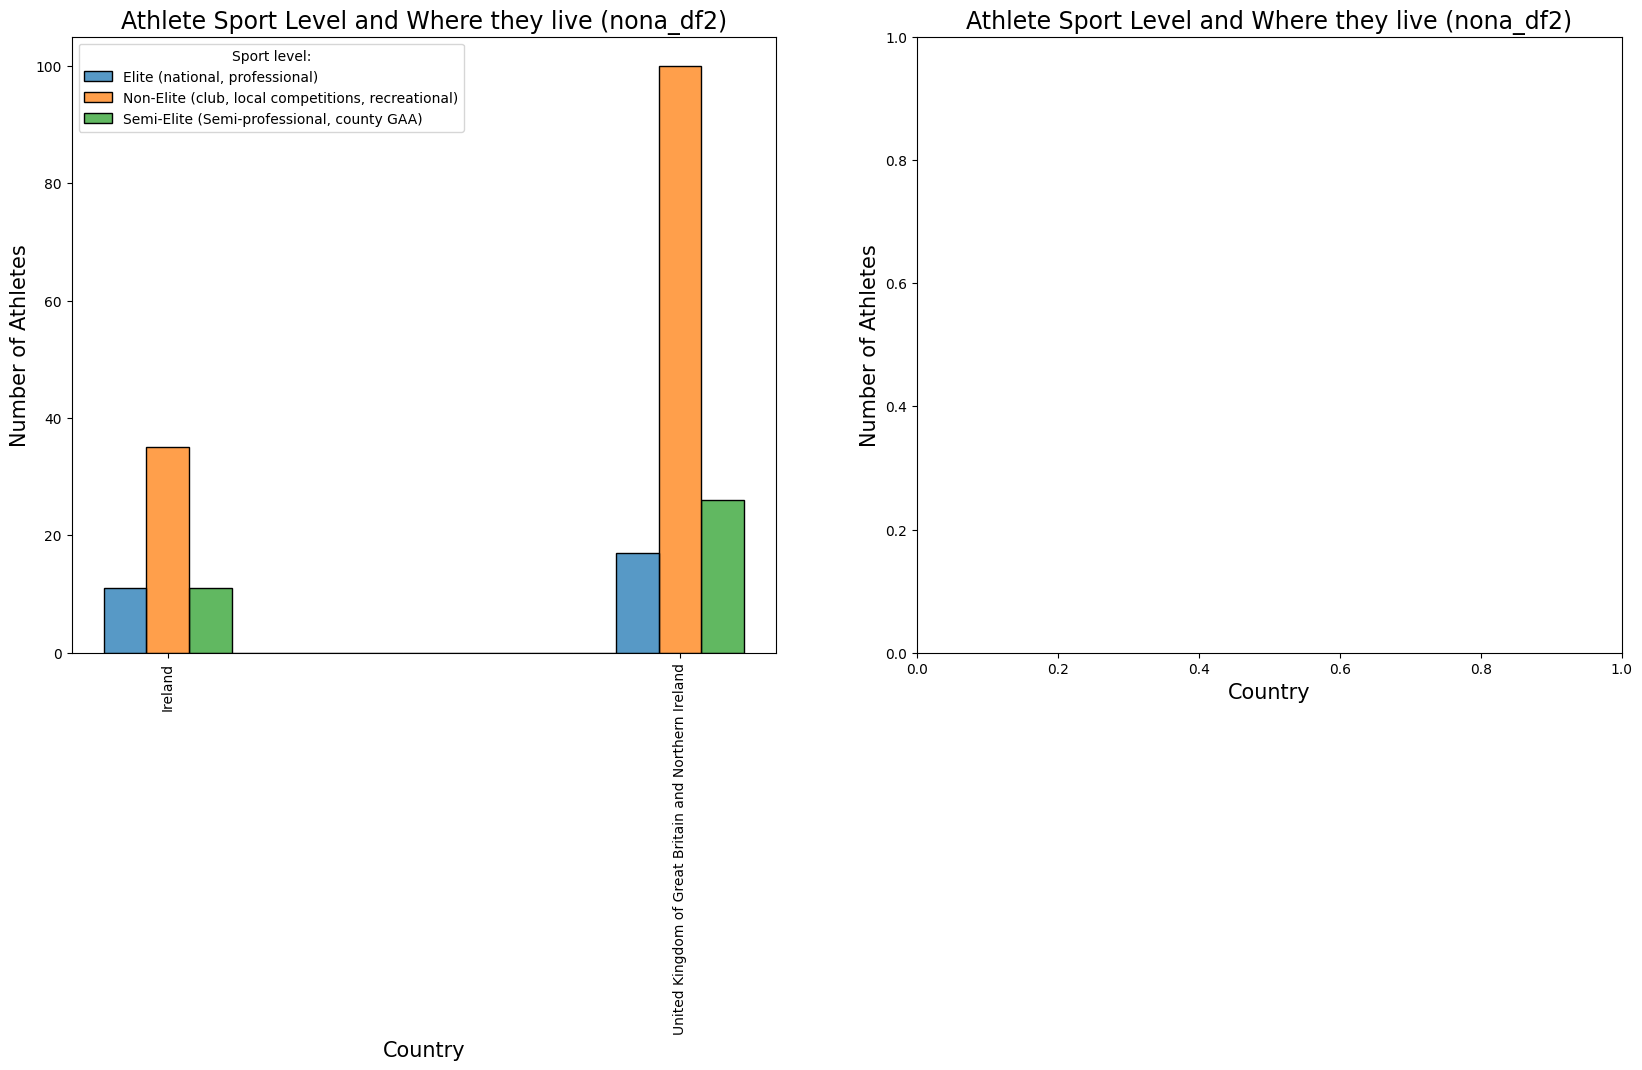

In [92]:
fig, ax= plt.subplots(1,2,figsize=(20,8))
fig=sns.histplot(data=nona_df2[(nona_df2['In what country do you live?']== 'United Kingdom of Great Britain and Northern Ireland') | (nona_df2['In what country do you live?']== 'Ireland')], x='In what country do you live?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[0])

ax[0].set_title('Athlete Sport Level and Where they live (nona_df2)',fontsize=17)
ax[0].set_xlabel('Country', fontsize=15)
ax[0].set_ylabel('Number of Athletes', fontsize=15)
x=['United Kingdom of Great Britain and Northern Ireland', 'Ireland']
ax[0].set_xticks(x)
ax[0].set_xticklabels(['United Kingdom of Great Britain and Northern Ireland', 'Ireland'],rotation='vertical')

fig=sns.histplot(data=nona_df2[(nona_df2['In what country do you live?']== 'Ausralia') | (nona_df2['In what country do you live?']== 'Belgium') | (nona_df2['In what country do you live?']== 'France') | (nona_df2['In what country do you live?']== 'New Zealand') | (nona_df2['In what country do you live?']== 'Sweden') | (nona_df2['In what country do you live?']== 'Thailand')], x='In what country do you live?', hue='Sport level:',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_title('Athlete Sport Level and Where they live (nona_df2)',fontsize=17)
ax[1].set_xlabel('Country', fontsize=15)
ax[1].set_ylabel('Number of Athletes', fontsize=15)
x=['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand']
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand'],rotation='vertical')

In the graph above with dataset where we droped all missing data we see:
1. The only countries that has athlete paticiapants are Ireland and UK
2. In Ireland there are about ~37 Non-Elite athletes, ~10 Semi-Elite Athletes and ~10 Elite athletes.
3. In the UK there are about ~100 Non-Elite athletes, ~25 Semi-Elite atheltes and ~15 Elite athletes.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

ConversionError: Failed to convert value(s) to axis units: ['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand']

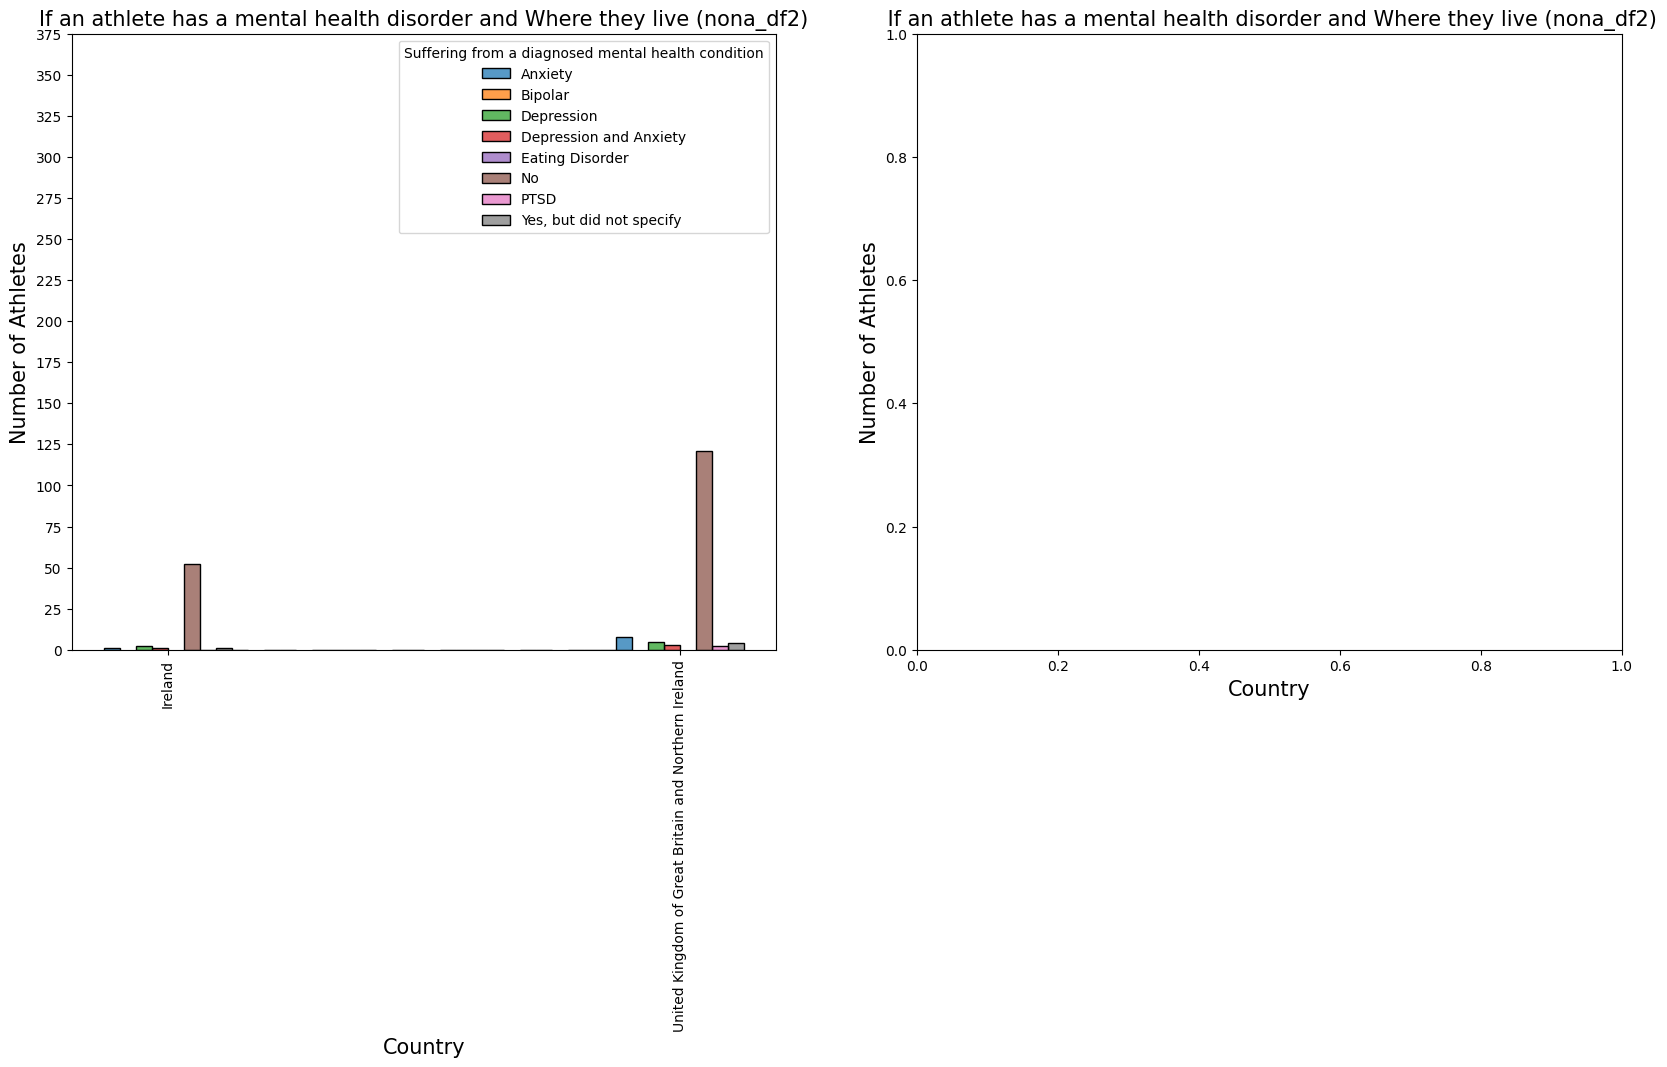

In [93]:
fig, ax= plt.subplots(1,2,figsize=(20,8))
fig=sns.histplot(data=nona_df2[(nona_df2['In what country do you live?']== 'United Kingdom of Great Britain and Northern Ireland') | (nona_df2['In what country do you live?']== 'Ireland')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[0])

ax[0].set_title('If an athlete has a mental health disorder and Where they live (nona_df2)',fontsize=15)
ax[0].set_xlabel('Country', fontsize=15)
ax[0].set_ylabel('Number of Athletes', fontsize=15)
x=['United Kingdom of Great Britain and Northern Ireland', 'Ireland']
ax[0].set_xticks(x)
ax[0].set_xticklabels(['United Kingdom of Great Britain and Northern Ireland', 'Ireland'],rotation='vertical')
ax[0].set_yticks(np.arange(0, 400, 25)) 

fig=sns.histplot(data=nona_df2[(nona_df2['In what country do you live?']== 'Ausralia') | (nona_df2['In what country do you live?']== 'Belgium') | (nona_df2['In what country do you live?']== 'France') | (nona_df2['In what country do you live?']== 'New Zealand') | (nona_df2['In what country do you live?']== 'Sweden') | (nona_df2['In what country do you live?']== 'Thailand')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_title(' If an athlete has a mental health disorder and Where they live (nona_df2)',fontsize=15)
ax[1].set_xlabel('Country', fontsize=15)
ax[1].set_ylabel('Number of Athletes', fontsize=15)
x=['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand']
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Belgium', 'France', 'New Zealand', 'Sweden', 'Thailand'],rotation='vertical')

We see that most athletes are located in 'Ireland' and the 'UK'. So below I will create a subplot that focuses on both of these contries, so we can see the bigger picture of athletes with a mental health condition in these contries.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

Text(0, 0.5, 'Number of Athletes')

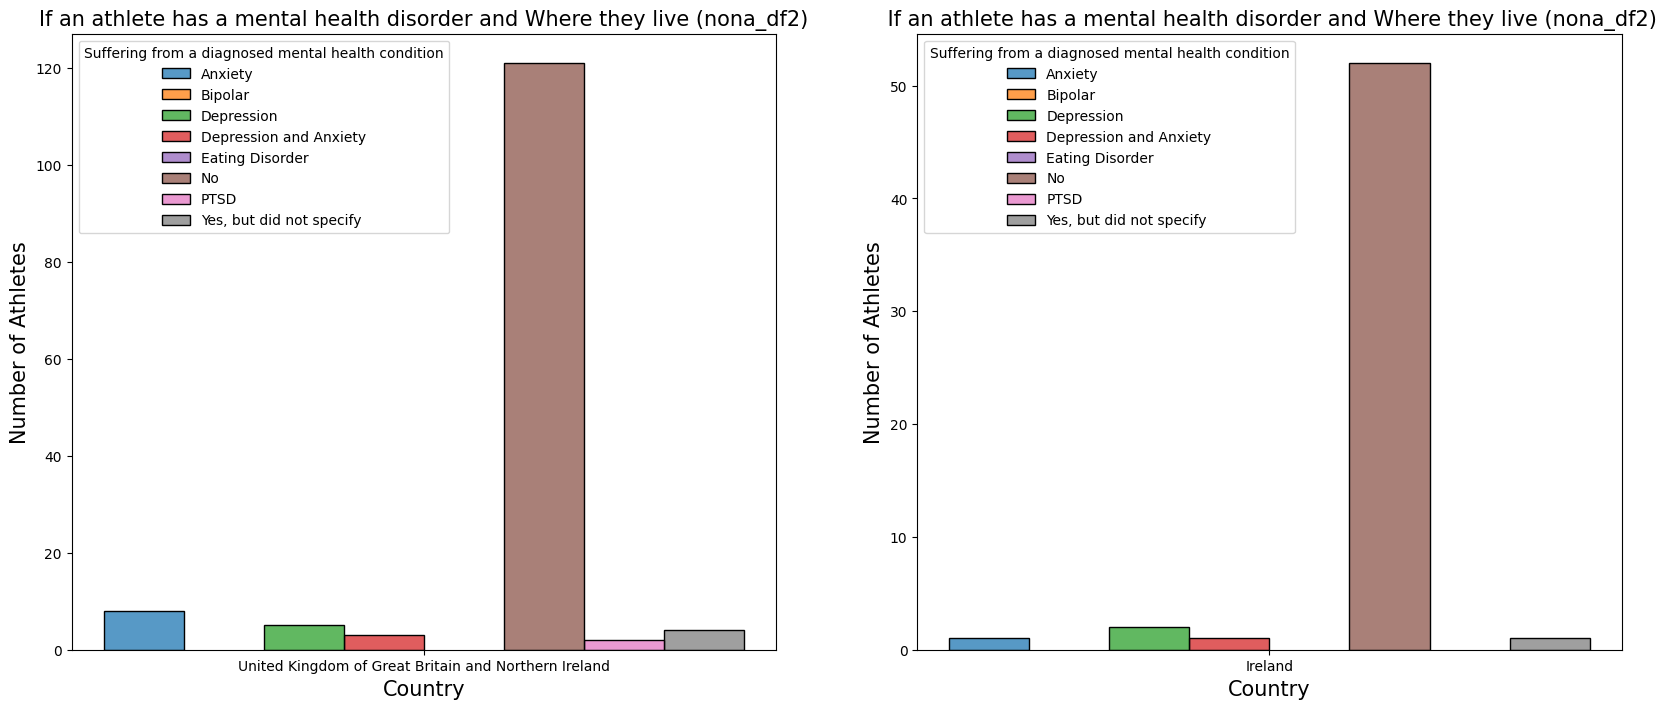

In [94]:
fig, ax= plt.subplots(1,2,figsize=(20,8))
fig=sns.histplot(data=nona_df2[(nona_df2['In what country do you live?']== 'United Kingdom of Great Britain and Northern Ireland')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[0])

ax[0].set_title('If an athlete has a mental health disorder and Where they live (nona_df2)',fontsize=15)
ax[0].set_xlabel('Country', fontsize=15)
ax[0].set_ylabel('Number of Athletes', fontsize=15)


fig=sns.histplot(data=nona_df2[(nona_df2['In what country do you live?']== 'Ireland')], x='In what country do you live?', hue='Suffering from a diagnosed mental health condition',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_title(' If an athlete has a mental health disorder and Where they live (nona_df2)',fontsize=15)
ax[1].set_xlabel('Country', fontsize=15)
ax[1].set_ylabel('Number of Athletes', fontsize=15)


From the graph above we see:

- The Countries with the most individuals in this survey are UK and Ireland.
- In the UK most ~120 people have no mental health disorder. Those falling under ~8 people in order from most to least are Anxiety, Depression, Depression & Anxiety, Has a mental health disorder but did not specify and PTSD.
- In Ireland most ~53 people have not mental health disorder. Those falling under ~2 people in order from most to least are Depression, Anxiety, Depression & Anxiety and Has a mental health disorder but did not specify what it was.

We now know that most athletes in the survey live in Ireland and the UK. We also know within these countries a few athletes suffer from 3-4 different mental health conditions. Now we want to find out in both individual country, how many athletes suffer from each condition and what age group they fall under.

In [95]:
# Create a dataset with only data concerning Ireland
Ir_df2= nona_df2[(nona_df2['In what country do you live?']== 'Ireland')]

Ir_df2.head(5)

,Respondent ID,Gender:,Age Group:,In what country do you live?,Suffering from a diagnosed mental health condition,Occupation,Marital Status,Are you a smoker?,Do you eat 5 or more portions of fruit and vegetables per day?,How much sleep do you usually get per night?,...,It does not take me long to recover from a stressful event,It is hard for me to snap back when something bad happens,I usually come through difficult times with little trouble,I tend to take a long time to get over setbacks in my life,I experience a general sense of emptiness,I miss having people around,There are many people I can trust completely,I often feel rejected,There are enough people I feel close to,There are plenty of people I can rely on when I have problems
16,11775368428,Female,18-20,Ireland,Depression,Student,Single,Never,No,6.5,...,Agree,Disagree,Agree,Neutral,Strongly Agree,More or Less,Agree,Agree,Agree,More or Less
35,11772116384,Female,51-60,Ireland,No,Home maker,Married/cohabiting with partner,Never,No,6.5,...,Strongly Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,More or Less,Disagree,Strongly Agree,Agree
38,11771477515,Female,51-60,Ireland,No,It security,Married/cohabiting with partner,Never,Yes,6.0,...,Agree,Disagree,Disagree,Disagree,Strongly Disagree,Strongly Disagree,More or Less,Strongly Disagree,Strongly Agree,Agree
46,11770637135,Female,21-30,Ireland,No,Business consultant,Married/cohabiting with partner,Never,Yes,7.5,...,Agree,Disagree,Neutral,Disagree,Agree,Strongly Agree,More or Less,More or Less,More or Less,Agree
51,11770341437,Female,51-60,Ireland,No,Dancer,Married/cohabiting with partner,Ex-smoker,Yes,6.5,...,Strongly Agree,Strongly Disagree,Disagree,Disagree,Strongly Disagree,More or Less,Agree,Strongly Disagree,Agree,Agree


In [96]:
# Create a dataset with only data concerning the UK
UK_df2= nona_df2[(nona_df2['In what country do you live?']== 'United Kingdom of Great Britain and Northern Ireland')]

UK_df2.head(5)

,Respondent ID,Gender:,Age Group:,In what country do you live?,Suffering from a diagnosed mental health condition,Occupation,Marital Status,Are you a smoker?,Do you eat 5 or more portions of fruit and vegetables per day?,How much sleep do you usually get per night?,...,It does not take me long to recover from a stressful event,It is hard for me to snap back when something bad happens,I usually come through difficult times with little trouble,I tend to take a long time to get over setbacks in my life,I experience a general sense of emptiness,I miss having people around,There are many people I can trust completely,I often feel rejected,There are enough people I feel close to,There are plenty of people I can rely on when I have problems
10,11781906506,Female,41-50,United Kingdom of Great Britain and Northern I...,No,Project Manager,Married/cohabiting with partner,Never,No,7.5,...,Agree,Strongly Disagree,Strongly Agree,Disagree,Disagree,More or Less,Agree,Strongly Disagree,Agree,Agree
19,11774385902,Male,41-50,United Kingdom of Great Britain and Northern I...,No,National Coach Development Manager,Married/cohabiting with partner,Never,Yes,7.0,...,Strongly Agree,Disagree,Agree,Strongly Disagree,Strongly Disagree,Disagree,Agree,Strongly Disagree,Agree,Agree
23,11773608256,Female,21-30,United Kingdom of Great Britain and Northern I...,No,Student,Single,Never,No,6.0,...,Neutral,Neutral,Agree,Neutral,Disagree,Disagree,Disagree,Agree,More or Less,Agree
41,11771200410,Male,21-30,United Kingdom of Great Britain and Northern I...,No,coach,Single,Never,Yes,6.0,...,Agree,Agree,Neutral,Agree,Agree,Disagree,Strongly Disagree,Agree,More or Less,Disagree
47,11770575294,Male,21-30,United Kingdom of Great Britain and Northern I...,No,Trainee Accountant,Single,Occassional,No,6.5,...,Disagree,Agree,Disagree,Agree,Agree,Strongly Agree,Disagree,Strongly Agree,Disagree,Disagree


We will create seperate subplots for both countries Ireland and UK. Determining how many athletes in the dataset suffer from a mental health disorder and their age group

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

Text(0, 0.5, 'Number of Athletes')

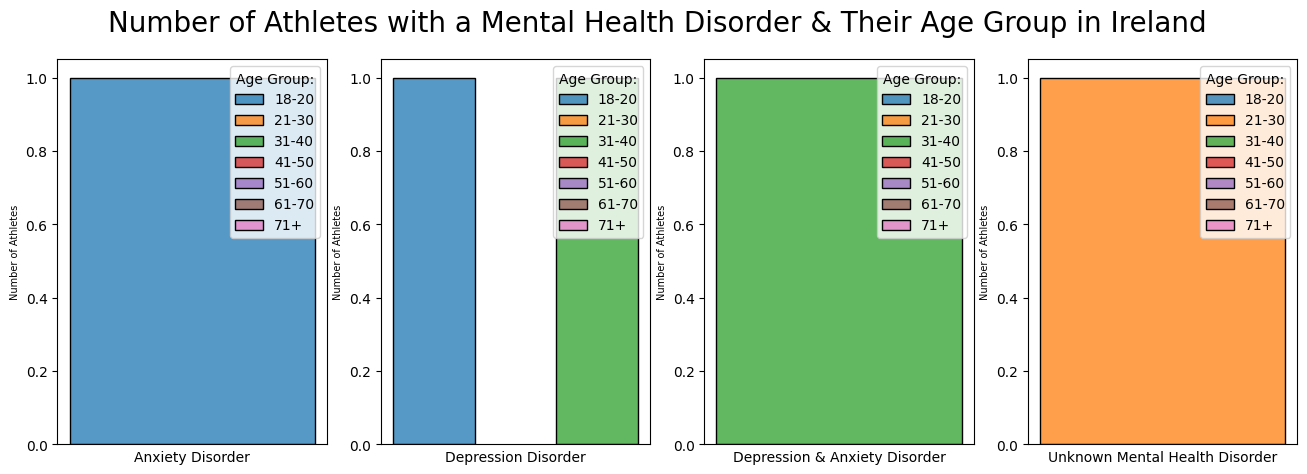

In [97]:
fig, ax =plt.subplots(1, 4, figsize=(16,5))
fig.suptitle('Number of Athletes with a Mental Health Disorder & Their Age Group in Ireland', fontsize=20)


fig=sns.histplot(data=Ir_df2[(Ir_df2['Suffering from a diagnosed mental health condition']== 'Anxiety')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[0])
ax[0].set_xlabel('Anxiety Disorder', fontsize=10)
ax[0].set_ylabel('Number of Athletes', fontsize=7)

fig=sns.histplot(data=Ir_df2[(Ir_df2['Suffering from a diagnosed mental health condition']== 'Depression')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_xlabel('Depression Disorder', fontsize=10)
ax[1].set_ylabel('Number of Athletes', fontsize=7)

fig=sns.histplot(data=Ir_df2[(Ir_df2['Suffering from a diagnosed mental health condition']== 'Depression and Anxiety')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[2])
ax[2].set_xlabel('Depression & Anxiety Disorder', fontsize=10)
ax[2].set_ylabel('Number of Athletes', fontsize=7)

fig=sns.histplot(data=Ir_df2[(Ir_df2['Suffering from a diagnosed mental health condition']== 'Yes, but did not specify')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[3])
ax[3].set_xlabel('Unknown Mental Health Disorder', fontsize=10)
ax[3].set_ylabel('Number of Athletes', fontsize=7)



From the graph above in Ireland there is a low number of atheltes that have a mental health disorder. The only mental health disorders that athletes have are (Anxiety, Depresssion, Depression & Anxiety and an Unspecified Health disorder. 
- Anxiety Disorder, only one athlete has this condition and they are in the (18-20) age group. 
- Depression Disorder, two athletes have this condition. One of them is is the (18-20) age group and the other in the (31-40) age group.
- Depression & Anxiety Disorder, only one athlete has this condition and they are in the (31-40) age group.
- Unknow Mental Health Disorder, only one athlete fits in this category and they are in the (21-30) age group.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

Text(1112.2911877394636, 0.5, 'Number of Athletes')

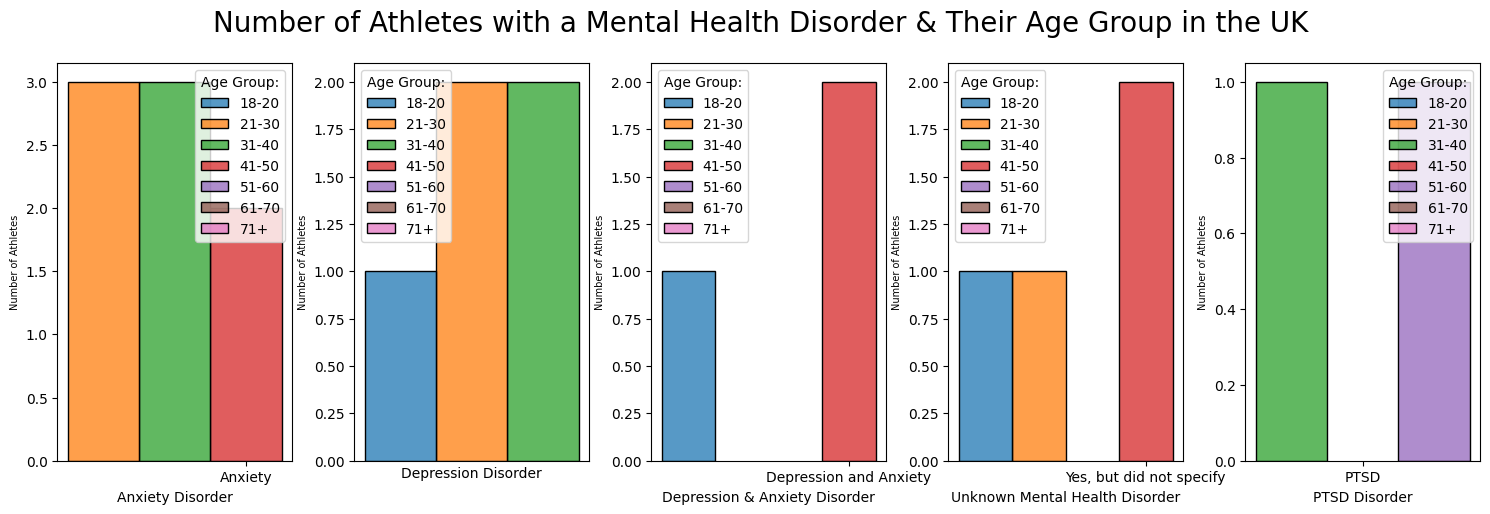

In [98]:
fig, ax =plt.subplots(1, 5, figsize=(15,5))
fig.suptitle('Number of Athletes with a Mental Health Disorder & Their Age Group in the UK', fontsize=20)

# Seperate the subplot so they dont overlap
fig.tight_layout()


fig=sns.histplot(data=UK_df2[(UK_df2['Suffering from a diagnosed mental health condition']== 'Anxiety')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[0])
ax[0].set_xlabel('Anxiety Disorder', fontsize=10)
ax[0].set_ylabel('Number of Athletes', fontsize=7)

fig=sns.histplot(data=UK_df2[(UK_df2['Suffering from a diagnosed mental health condition']== 'Depression')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[1])
ax[1].set_xlabel('Depression Disorder', fontsize=10)
ax[1].set_ylabel('Number of Athletes', fontsize=7)

fig=sns.histplot(data=UK_df2[(UK_df2['Suffering from a diagnosed mental health condition']== 'Depression and Anxiety')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[2])
ax[2].set_xlabel('Depression & Anxiety Disorder', fontsize=10)
ax[2].set_ylabel('Number of Athletes', fontsize=7)

fig=sns.histplot(data=UK_df2[(UK_df2['Suffering from a diagnosed mental health condition']== 'Yes, but did not specify')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[3])
ax[3].set_xlabel('Unknown Mental Health Disorder', fontsize=10)
ax[3].set_ylabel('Number of Athletes', fontsize=7)

fig=sns.histplot(data=UK_df2[(UK_df2['Suffering from a diagnosed mental health condition']== 'PTSD')], x='Suffering from a diagnosed mental health condition', hue='Age Group:',multiple='dodge', discrete=1, ax=ax[4])
ax[4].set_xlabel('PTSD Disorder', fontsize=10)
ax[4].set_ylabel('Number of Athletes', fontsize=7)


From the graph above in the UK there is a low number of atheltes that have a mental health disorder. The only mental health disorders that athletes have in the UK are (Anxiety, Depresssion, Depression & Anxiety, PTSD and an Unspecified Health disorder. 
- Anxiety Disorder, eight athletes have this condition. Three in the (21-30) age group, three in the (31-40) age group, and two in the (41-50) age group. 
- Depression Disorder, five athletes have this condition. One in the (18-20) age group, two in the (21-30) age group, and two in the (31-40) age group.
- Depression & Anxiety Disorder, three athlete have this condition. One in the (18-10) age group, and two in the (41-50) age group.
- Unknow Mental Health Disorder, four athletes fit into this category. One in the (18-20) age group, one in the (21-30) age group, and two in the (41-50) age group.
- PTSD Disorder, two athletes have this condition. One in the (31-40) age group and one in the (51-60) age group.

From the previous two graph we can determine that the athletes in the dataset ages from 18-50 suffer the most from mental health. 
In this dataset we did not determine any athlete 51+ suffering from any mental health disrorder except for one athlete that is suffering from PTSD. 

In [99]:
# Create a copy of dataset df2 where we categorize all the mental health disorders as 'Yes'. So now there are only Yes and No answers in the column.

nona_df3 = nona_df2.copy()


# Replace all answers in the Diagnosis column that say Depression and Anxiety with 'Yes'
nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Depression and Anxiety': 'Yes'})

# Replace all answers in the Diagnosis column that say Anxiety with 'Yes'
nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Anxiety': 'Yes'})

# Replace all answers in the Diagnosis column that say Depression with 'Yes'
nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Depression': 'Yes'})

# Replace all answers in the Diagnosis column that say Bipolar with 'Yes'
nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Bipolar':'Yes'})

# Replace all answers in the Diagnosis column that say Eating Disorder with 'Yes'
nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Eating Disorder': 'Yes'})

# Replace all answers in the Diagnosis column that say 'Yes, but did not specify' with 'Yes'
nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Yes, but did not specify': 'Yes'})

# Replace all answers in the Diagnosis column that say PTSD with 'Yes'
nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'PTSD': 'Yes'})

/tmp/ipykernel_32/1241344452.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Depression and Anxiety': 'Yes'})
/tmp/ipykernel_32/1241344452.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nona_df3['Suffering from a diagnosed mental health condition'] = nona_df3['Suffering from a diagnosed mental health condition'].replace({'Anxiety': 'Yes'})
/tmp/ipykernel_32/1241344452.py:13: FutureWarning: The behavior of Series.replac

In [100]:
# Check to see that the only values are 'Yes' and 'No'
print(nona_df3['Suffering from a diagnosed mental health condition'].value_counts())

# Check the balance percentage
print(nona_df3['Suffering from a diagnosed mental health condition'].value_counts(normalize=True)*100)

Suffering from a diagnosed mental health condition
No     174
Yes     28
Name: count, dtype: int64
Suffering from a diagnosed mental health condition
No     86.138614
Yes    13.861386
Name: proportion, dtype: float64


We see that the dataset is moderately imbalanced with 86% 'No' (Not suffering from a mental health condition) and 13.8% 'Yes' (Suffering from a mental health condition). We will still proceed with building a predictive model with no up/down sampling just for curiosity purposes. As we continue, I want to see what the metric score will be and how well the model truly makes predictions by displaying a Confusion Matrix.

In [101]:
# Create a dataframe of just column names of dataset nona_df3 
col_num3 =nona_df3.columns
col_num3.tolist()

['Respondent ID',
 'Gender:',
 'Age Group:',
 'In what country do you live?',
 'Suffering from a diagnosed mental health condition',
 'Occupation',
 'Marital Status',
 'Are you a smoker?',
 'Do you eat 5 or more portions of fruit and vegetables per day?',
 'How much sleep do you usually get per night?',
 'Since the outbreak of COVID-19, have you had to sheild?',
 'How many weeks have you been abiding by social distancing rules?',
 'Number of people in the household throughout lockdown (isolation bubble):',
 'Are you an athlete involved in a structured, rule-bound, competitive physical activity?',
 'I consider myself an athlete',
 'I have many goals related to sport',
 'Most of my friends are athletes',
 'Sport is the most important part of my life',
 'I spend more time thinking about sport than anything else',
 'I feel bad about myself when I do badly in sport',
 'I would be very depressed if I were injured and could not compete in sport',
 'What sport do you primarily play?',
 'Sport 

In [102]:
#Create for loop to encode all categorical variables in dataset nona_df3

for col in col_num3:
    nona_df3[col]=nona_df3[col].cat.codes
  

In [103]:
#Check to see if categorical variables of dataframe striped of nulls have been encoded

nona_df3.head(10)

,Respondent ID,Gender:,Age Group:,In what country do you live?,Suffering from a diagnosed mental health condition,Occupation,Marital Status,Are you a smoker?,Do you eat 5 or more portions of fruit and vegetables per day?,How much sleep do you usually get per night?,...,It does not take me long to recover from a stressful event,It is hard for me to snap back when something bad happens,I usually come through difficult times with little trouble,I tend to take a long time to get over setbacks in my life,I experience a general sense of emptiness,I miss having people around,There are many people I can trust completely,I often feel rejected,There are enough people I feel close to,There are plenty of people I can rely on when I have problems
10,849,0,3,7,1,256,2,5,0,11,...,0,4,3,1,1,2,0,4,0,0
16,843,0,0,3,0,351,3,5,0,9,...,0,1,0,2,3,2,0,0,0,2
19,840,1,3,7,1,205,2,5,1,10,...,3,1,0,4,4,1,0,4,0,0
23,836,0,1,7,1,351,3,5,0,8,...,2,2,0,2,1,1,1,0,2,0
35,824,0,4,3,1,145,2,5,0,9,...,3,4,3,1,4,3,2,1,3,0
38,821,0,4,3,1,171,2,5,1,8,...,0,1,1,1,4,4,2,4,3,0
41,818,1,1,7,1,394,3,5,1,8,...,0,0,2,0,0,1,4,0,2,1
46,813,0,1,3,1,44,2,5,1,11,...,0,1,2,1,0,3,2,2,2,0
47,812,1,1,7,1,370,3,6,0,9,...,1,0,1,0,0,3,1,3,1,1
51,808,0,4,3,1,81,2,4,1,9,...,3,4,1,1,4,2,0,4,0,0


In [104]:
# Create a correlation chart with dataset nona_df3 to see what variables are highly correlated 
corr2= nona_df3.corr()
corr_table =corr2.unstack()
sorted_pairs = corr_table.sort_values(ascending=False)
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Respondent ID                                                                                                 Respondent ID                                                                                                   1.000000
I spend more time thinking about sport than anything else                                                     I spend more time thinking about sport than anything else                                                       1.000000
During the past month how often did you feel that our society is becoming a better place for people like you  During the past month how often did you feel that our society is becoming a better place for people like you    1.000000
During the past month how often did you feel that you belong to a community                                   During the past month how often did you feel that you belong to a community                                     1.000000
During the past month how often did you feel that you had somthing important

We see that the highly correlated variables (>0.5) in dataset nona_df3 are:

'I have a hard time making it through stressful events' and 'It is hard for me to snap back when something bad happens with a correlation of (0.626221)

'I get sudden feelings of panic:' and 'I get a sort of frightened feeling like 'butterflies' in my stomach:' with a correlation of (0.564985)

## Split Data 

Now we will split the data into features/target variable and training/validation/test sets.

We will split the data 80/20 into a training set and a test set.

Then we will split the training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets.

In [105]:
# Isolate target variable
y= nona_df3['Suffering from a diagnosed mental health condition']

# Isolate features 
X = nona_df3.drop(columns= 'Suffering from a diagnosed mental health condition', axis=1)

# Split into train and test sets
X_tr,X_test,y_tr,y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

# Split into train and validation sets
X_train,X_val,y_train,y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25, random_state=42)


In [106]:
# Verify the number of samples in the partitioned data
X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape

((161, 65), (41, 65), (41, 65), (161,), (41,), (41,))

# Modeling 

#### XGBoost

The hyperparameters we will tune are:

- 'max_depth'
- 'min_child_weight'
- 'learning_rate'
- 'n_estimators'

In [107]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
xgb_params = {'max_depth': [4,6,8,None],
             'min_child_weight':[1,5,15],
             'learning_rate':[0.01, 0.1],
             'n_estimators':[75, 100, 300]}

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, xgb_params, scoring=scoring, refit='f1')

In [109]:
# Fit the model to the training data
xgb_cv.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [4, 6, 8, None],
                         'min_child_weight': [1, 5, 15],
                         'n_estimators': [75, 100, 300]},
             refit='f1', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [110]:
# Examine the Model best score 

xgb_cv.best_score_

0.9284848484848485

In [111]:
# Examine Paramaters best score 

xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 75}

In [112]:
def make_results(model_name:str, model_object, metric:str):
    
    '''
    Arguments:
        model_name (string): what we want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
        
# Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict ={'precision' : 'mean_test_precision',
               'recall': 'mean_test_recall',
               'f1': 'mean_test_f1',
               'accuracy': 'mean_test_accuracy'}
    
# Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
# Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
# Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
# Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )
    
    return table 

In [113]:
results = make_results('XGBoost', xgb_cv, 'f1')
results

,model,precision,recall,F1,accuracy
0,XGBoost,0.866667,1.0,0.928485,0.866667


Surprisingly with an imbalanced dataset all the scores are pretty high. Especially the F1 score that we want to pay the most attention to. This can be due to the fact that it’s a weighted F1 score. A weighted F1 score considers the class frequencies and assigns different weights to different classes based on their prevalence in the dataset.
- Precision Score 86.6%
- Recall Score 100%
- F1 Score 92.8%
- Accuracy Score 86.6%


Now we will use the XGBoost model to predict on the validation data

In [114]:
# Use XGBoost Model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

In [115]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): How the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [116]:
# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGBoost val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,XGBoost,0.866667,1.0,0.928485,0.866667
0,XGBoost val,0.853659,1.0,0.921053,0.853659


We see that the scores did not fluctuate much from the training data score. This is a good sign that the model did not overfit the data.

## Use XGBoost model to predict on test data

Now, we will use the XGBoost model to predict on the test dataset. This will give us the final indication of how we should expect the model to perform on new future data. 

In [117]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGBoost test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,XGBoost,0.866667,1.0,0.928485,0.866667
0,XGBoost val,0.853659,1.0,0.921053,0.853659
0,XGBoost test,0.853659,1.0,0.921053,0.853659


The test data score are exactly the same as the validation scores. 

In [118]:
# Figure out what encoded value was given in the mental health condition column 
print(nona_df3["Suffering from a diagnosed mental health condition"].value_counts())

Suffering from a diagnosed mental health condition
1    174
0     28
Name: count, dtype: int64


We see that In the 'Suffering from a diagnosed mental health condition', the encoded values are as follows: 'No' = 1 and 'Yes'=0

## Confusion matrix
Plot a confusion matrix of the champion model's predictions on the test data. The confusion matrix will further asses the performance of the model.

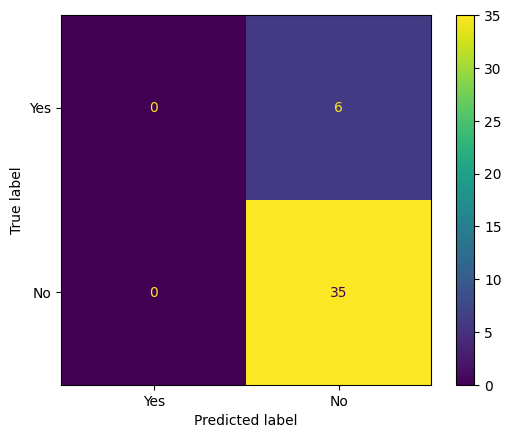

In [119]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Yes', 'No']) 
disp.plot()

The Confusion Matrix summarizes the machine's predictions as follows:

- True Negatives (Upper Left Quadrant): 0 athletes correctly predicted as not suffering from a mental health condition.
- False Positives (Upper Right Quadrant): 6 athletes incorrectly predicted as having a mental health condition when they do not.
- False Negatives (Lower Left Quadrant): 0 athletes incorrectly predicted as not having a mental health condition when they actually do.
- True Positives (Lower Right Quadrant): 35 athletes correctly predicted as having a mental health condition.


## Conclusion 

### Data Insights 
#### Side Note
For this project, I decided to experiment with two different datasets. The first dataset (df2) involved using mode imputation to fill in missing values, while the second dataset (nona_df2) had all missing values removed. My goal was to determine if there were significant differences in insights derived from the two approaches. I found that the primary difference was the volume of data in each dataset, with no major variations in the insights obtained. Ultimately, I chose to use the nona_df2 dataset to build the machine learning model, as it provided a more accurate representation of the data without extensive manipulation.


#### Nona_Df2 Dataset
1. Across all sports, there are more 'Non-Elite' athletes (club, local competition, recreational) compared to Elite athletes (national, professional) and Semi-Elite athletes (semi-professional, county GAA).


2. - The highest participation is observed in (Ball Sports), followed by (Track & Field), (Dance, Gymnastics, and Strength), and (Rowing & Kayaking). Specifically, there are approximately ~110 athletes in Ball Sports, ~53 athletes in Track & Field, ~9 athletes in Dance, Gymnastics, and Strength, and ~8 athletes in Rowing & Kayaking. Other sports have fewer than 3 participants each.
   - Within Ball Sports, there are about ~70 Non-Elite athletes, ~25 Semi-Elite athletes, and ~15 Elite athletes.
   - For Track & Field, there are approximately ~45 Non-Elite athletes, ~5 Semi-Elite athletes, and ~3 Elite athletes.
   - In Dance, Gymnastics, and Strength, there are around ~7 Non-Elite athletes and ~2 Elite athletes.
   - In Rowing & Kayaking, there are about ~3 Non-Elite athletes, ~2 Semi-Elite athletes, and ~3 Elite athletes. 
   
   
3. I analyzed the athletes' involvement in structured/rule-bound competitive sports and their weekly practice hours. The findings are as follows:
   - All athletes participate in structured/rule-bound competitive sports.
   - A significant proportion of the athletes practice between 1-5 hours or 6-10 hours per week.
   
   
4. Based on location and sports level, the analysis revealed the following:
   - All athletes in this dataset are from either Ireland or the UK.
   - In Ireland, there are approximately 37 Non-Elite athletes, 10 Semi-Elite athletes, and 10 Elite athletes.
   - In the UK, there are approximately 100 Non-Elite athletes, 25 Semi-Elite athletes, and 15 Elite athletes.
   
   
5. Based on location (Ireland and the UK) and different mental health conditions, the analysis revealed the following:
   - In Ireland, the majority of athletes, approximately 120, do not have a mental health condition. A smaller number of athletes, around 2 each, suffer from Anxiety, Depression, both Depression and Anxiety, or have an unspecified mental health condition.
   - In the UK, the majority of athletes, approximately 53, do not have a mental health condition. A smaller number of athletes, varying under 8 each, suffer from Anxiety, Depression, both Depression and Anxiety, PTSD, or have an unspecified mental health condition.
    
 
 6. Based on location (Ireland and the UK), mental health conditions, and typical age groups affected, the analysis revealed the following:
 
    In Ireland:

    - Anxiety Disorder: Only 1 athlete has this condition, and they are in the 18-20 age group.
    - Depression Disorder: 2 athletes have this condition; one is in the 18-20 age group and the other in the 31-40 age group.
    - Depression & Anxiety Disorder: Only 1 athlete has this condition, and they are in the 31-40 age group.
    - Unknown Mental Health Disorder: Only 1 athlete fits in this category, and they are in the 21-30 age group.
    
    In the UK:

    - Anxiety Disorder: 8 athletes have this condition. 3 in the 21-30 age group, 3 in the 31-40 age group, and 2 in the 41-50 age group.
    - Depression Disorder: 5 athletes have this condition. 1 in the 18-20 age group, 2 in the 21-30 age group, and 2 in the 31-40 age           group.
    - Depression & Anxiety Disorder: 3 athletes have this condition. 1 in the 18-20 age group, and 2 in the 41-50 age group.
    - Unknown Mental Health Disorder: 4 athletes fit into this category. 1 in the 18-20 age group, 1 in the 21-30 age group, and 2 in the       41-50 age group.
    - PTSD Disorder: 2 athletes have this condition. 1 in the 31-40 age group and 1 in the 51-60 age group.
    
    Overall Determination:

    - Athletes in the dataset aged 18-50 suffer the most from mental health conditions.
    - There are no athletes aged 51+ in the dataset who suffer from any mental health disorder, except for 1 athlete suffering from PTSD.

7. Upon creating a correlation chart, I found that the only highly correlated variables (with a correlation coefficient greater than 0.5) in the dataset nona_df3 are:

   - 'I have a hard time making it through stressful events' and 'It is hard for me to snap back when something bad happens,' with a correlation of 0.626221.
   - 'I get sudden feelings of panic' and 'I get a sort of frightened feeling like 'butterflies' in my stomach,' with a correlation of 0.564985.


## Summary of Model Results
1. Dataset Imbalance: The dataset exhibited moderate to extreme class imbalance, with 86% of the samples classified as 'No' (not suffering from a mental health condition) and 13.8% classified as 'Yes' (suffering from a mental health condition). For the sake of curiosity, I chose to work with the imbalanced dataset rather than applying upsampling or downsampling techniques.
   
2. Model Performance with XGBoost: I employed an XGBoost model, which achieved an impressive F1 score of 92% on the test data. However, this high score was primarily due to the weighted F1 score, which adjusts for class frequencies by assigning different weights based on their prevalence in the dataset.

3. Confusion Matrix Analysis: To further evaluate the model’s performance, I created a Confusion Matrix. This tool allowed me to more comprehensively assess how well the model was predicting the different classes.

4. Model Reliability: Despite the high F1 score, the model’s predictions proved unreliable. The imbalance in the dataset led to misleadingly high performance metrics, indicating that the model was not truly effective for making accurate predictions. 


## Recommendations / Next Steps
1. Address Missing Data: The analysis revealed a significant amount of missing data in many key columns. To improve the quality of future datasets, it is recommended that the athletes be resurveyed to ensure complete and accurate responses to all relevant questions. Alternatively, ensuring that the survey completion rates are high for all important questions could improve data reliability.

2. Focus on Relevant Locations: Given that the majority of the data pertains to athletes in Ireland and the UK, future surveys should be concentrated on these two countries. This approach will ensure that the data collected is more relevant and representative of the target population for this specific study.


3. Balance Data Across Sports Levels: The current dataset is heavily skewed towards Non-Elite athletes, with fewer Elite and Semi-Elite athletes represented. To achieve a more balanced dataset, efforts should be made to survey a greater number of athletes in the 'Elite' and 'Semi-Elite' categories. A more balanced dataset will allow for a better analysis of how different sports levels relate to mental health conditions.

4. Develop and Validate Models: Once accurate and balanced data is obtained, constructing a new XGBoost model should be a priority. This model could be used to assess the predictability of mental health conditions among athletes, exploring various factors such as symptoms, emotional influences, and sports levels. Further validation and refinement of the model can provide deeper insights into the factors contributing to mental health issues.